# NAME :

# MOHAMED MOHAMED EZZAT                 42010616

## HANA HANY                                                          42010684
## YOSSEF MOHAMED HEBASHY                          41910273
## OMAR ADEL SHALABY                                       42010541
## AMIR ESSAMELDIN SALEH                                42010672

# REPORT

# Introduction 


### the dataset from kaggle from this link https://www.kaggle.com/datasets/tunguz/used-car-auction-prices

# Questions  


### 1-most expensive car ?
### 2-which make has more cars ?
### 3-what is the avg mmr ?
### 4-what is 5 top expensive cars whit condition of 5 ?
### 5-how many cars has odomiter less than 10k ?
### 6-what is the avg price of cars of each make for each conditon ?
### 7-how many cars have codition more than 4.5 and what is thir avg price ?
### 8-what is the max and min sellingprice whit thier condition ?
### 9-the corr between odomiter and sellingprice ?
### 10-how many cars for each make for each transmation ?
### 11-how many cars with an suv body ?
### 12-what is the avg price pased on year ?
### 13-what is the distribution of condition in the dataset?
### 14-how to visualiza the above car conditions as a pie chart ?
### 15-what is the max and min mmr ?
### 16-How does the average selling price vary across different MMR ranges ?
### 17-What is the relationship between the odometer reading and car age ?
### 18-What is the correlation between numerical variables (MMR, odometer, year, selling price) ?
### 19-How does the selling price change with increasing mileage for different car makes and conditions ?
### 20-What is the distribution of car conditions based on the year of the car ?


# import library

In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from  datasist.structdata import detect_outliers
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.impute import SimpleImputer


# Load the Data


In [46]:
car= pd.read_csv("C:/Users/muham/OneDrive/Desktop/Cars_Prices.csv" ,low_memory=False )

In [47]:
car.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


# Data Exploration

In [48]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
 16  Unnamed: 16   26 non-null      object 
dtypes: float64(1), int64(2), object(14)
memory usage

In [49]:
car.isnull().sum()

year                 0
make             10301
model            10399
trim             10651
body             13195
transmission     65353
vin                  4
state                0
condition        11794
odometer            94
color              749
interior           749
seller               0
mmr                  0
sellingprice         0
saledate             0
Unnamed: 16     558811
dtype: int64

# Data Cleaning

In [50]:
car=car.drop('Unnamed: 16',axis=1)
car=car.drop('saledate',axis=1) 
car=car.drop('vin',axis=1)

In [51]:

car.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000


In [52]:
#bgyb el mode bta3 el trans w bmla byh el fra8 el mwgod
mode_value = car['transmission'].mode()[0]
car['transmission'] = car['transmission'].fillna(mode_value)

In [53]:
car.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission        0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
dtype: int64

In [54]:
#b7wl el condition l float 34an hya asln object
car['condition'] = pd.to_numeric(car['condition'], errors='coerce')

In [55]:
#hna bmla el fra8 el mwgod f el condition b el motwast 
car['condition'].fillna(value=car['condition'].median(),inplace=True)

In [56]:
#b7wl el mmr l int 34an hya asln object
car['mmr'] = pd.to_numeric(car['mmr'], errors='coerce')

In [57]:
#hna bmla el fra8 el mwgod f el mmr b el motwast 
car['mmr'].fillna(value=car['mmr'].median(),inplace=True)

In [58]:
car.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission        0
state               0
condition           0
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
dtype: int64

In [59]:
#hna ana motar ams7 el row el fdya 34an dol ana m4 ha3rf atsrf fyhom w homa kda kda m4 kter
car=car.dropna(subset=['interior','color','odometer','body','trim','model','make'])

In [60]:
car.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [61]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544743 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          544743 non-null  int64  
 1   make          544743 non-null  object 
 2   model         544743 non-null  object 
 3   trim          544743 non-null  object 
 4   body          544743 non-null  object 
 5   transmission  544743 non-null  object 
 6   state         544743 non-null  object 
 7   condition     544743 non-null  float64
 8   odometer      544743 non-null  float64
 9   color         544743 non-null  object 
 10  interior      544743 non-null  object 
 11  seller        544743 non-null  object 
 12  mmr           544743 non-null  float64
 13  sellingprice  544743 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 62.3+ MB


In [62]:
#eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
car.nunique()


year                26
make                53
model              776
trim              1525
body                87
transmission         4
state               64
condition           41
odometer        169292
color               46
interior            17
seller           13995
mmr               1101
sellingprice      1869
dtype: int64

In [63]:
#hna ana lazm a3ml lower ll 7arf el awl 34an mafy4 7aga tkon mtkrra w y2ll el unique

def lower(c):
    return c.lower()

car['model']=car['model'].apply(lower)

In [64]:
for c in car['model'].unique():
    print(c)

sorento
3 series
s60
6 series gran coupe
altima
m5
cruze
a4
camaro
a6
optima
fusion
sonata
q5
6 series
impala
5 series
a3
xc70
x5
sq5
s5
verano
suburban
elr
v60
x6
ilx
k900
malibu
rx 350
versa
elantra
versa note
a8
x1
enclave
tts
4 series
silverado 2500hd
mdx
silverado 1500
srx
g coupe
g sedan
fx
santa fe
genesis
equus
sonata hybrid
accent
veloster
elantra coupe
azera
tucson
genesis coupe
wrangler
s-class
gs 350
outlander
c-class
mazda2
rio
m
370z
soul
outlander sport
slk-class
es 350
e-class
mazda3
cooper clubman
cooper
cx-9
forte
compass
jx
rx 450h
lr4
mazda5
range rover evoque
ls 460
glk-class
sportage
grand cherokee
mkx
xf
gl-class
m-class
cooper countryman
lancer
range rover sport
passat
corolla
xc60
sienna
juke
yaris
sentra
rogue
nv
cc
leaf
camry
tacoma
jetta
impreza wrx
fj cruiser
beetle
avalon
fr-s
nv200
rav4
quest
tundra
tc
maxima
cayenne
911
xterra
prius
s80
frontier
boxster
camry hybrid
xb
cube
jetta sportwagen
4runner
sequoia
legacy
armada
venza
murano
pathfinder
panamera
f

In [335]:
car.nunique()


year                26
make                53
model              772
trim              1525
body                87
transmission         4
state               64
condition           41
odometer        169292
color               46
interior            17
seller           13995
mmr               1101
sellingprice      1869
dtype: int64

In [336]:
def lower(c):
    return c.lower()

car['trim']=car['trim'].apply(lower)

In [337]:
for c in car['trim'].unique():
    print(c)

lx
328i sulev
t5
650i
2.5 s
base
1lt
2.0t premium plus quattro
lt
3.0t prestige quattro
se
2lt
ls
ltz
528i
1.8 tfsi premium
t6
sdrive35i
3.0t premium plus quattro
premium plus quattro
convenience group
xdrive35i
technology package
luxury
1.6 sl
1.6 sv
l 3.0t quattro
sdrive28i
leather group
quattro
428i sulev
work truck
advance and entertainment packages
535d
g37 sport
g37 journey
fx37
limited
5.0 r-spec
signature
gls
sport
sport 2.0t
turbo
gs
ultimate
3.8
3.8 track
unlimited rubicon
ex hybrid
2.5
s550
c250
sx
unlimited sahara
c250 sport
touring
m37
+
le
slk350
e350 sport
i sv
latitude
i touring
jx35
g37x
hse lux
ex
i sport
pure plus
l
glk350
unlimited sport
e350 sport bluetec
pure
gl450 4matic
ml350
pure premium
ralliart
c63 amg
supercharged limited edition
e350
es
se pzev
3.2
le 7-passenger mobility auto access
s
sr
1500 s
r-line pzev
sl
xle
prerunner
3.5 sl
1.6 s plus
2.5l pzev
wolfsburg edition pzev
tdi
tundra
3.5 sv
carrera s
two
sv
1.8 sl
s pzev
fe+ s
sr5
3.5 s
2.5i premium pzev
p

In [338]:
car.nunique()



year                26
make                53
model              772
trim              1506
body                87
transmission         4
state               64
condition           41
odometer        169292
color               46
interior            17
seller           13995
mmr               1101
sellingprice      1869
dtype: int64

In [339]:
def lower(c):
    return c.lower()

car['body']=car['body'].apply(lower)

In [340]:
for c in car['body'].unique():
    print(c)

suv
sedan
convertible
coupe
wagon
hatchback
crew cab
g coupe
g sedan
elantra coupe
genesis coupe
minivan
van
double cab
crewmax cab
access cab
king cab
supercrew
cts coupe
extended cab
e-series van
supercab
regular cab
g convertible
koup
quad cab
cts-v coupe
g37 convertible
club cab
xtracab
q60 convertible
cts wagon
g37 coupe
mega cab
cab plus 4
q60 coupe
cab plus
beetle convertible
tsx sport wagon
promaster cargo van
granturismo convertible
cts-v wagon
ram van
transit van
 navitgation
regular-cab


In [341]:
car.nunique()


year                26
make                53
model              772
trim              1506
body                46
transmission         4
state               64
condition           41
odometer        169292
color               46
interior            17
seller           13995
mmr               1101
sellingprice      1869
dtype: int64

In [342]:
#hna ana b7wlha l lower 34an hwa f 4 mot8yeyn f btr a7wlhom 34an yb2o tlata w a2der a8yr el talt
def lower(c):
    return c.lower()

car['transmission']=car['transmission'].apply(lower)

In [343]:
#hna ana b7wl ay kyma fyha sedan l el median w 34an el colomn da el mfrod maykon4 fyh 8ir mot8yryn bs m, a
import statistics

transmission_median = statistics.median(car['transmission'])

car['transmission'] = car['transmission'].replace('sedan', transmission_median)

In [344]:
for c in car['transmission'].unique():
    print(c)

automatic
manual


In [345]:
car.nunique()


year                26
make                53
model              772
trim              1506
body                46
transmission         2
state               64
condition           41
odometer        169292
color               46
interior            17
seller           13995
mmr               1101
sellingprice      1869
dtype: int64

In [346]:
#hna ana 3ayz a4yl ay row fyh arkam 34ana mafy4 alwan fyha arkam f btar a4lhom 
car = car[~car['color'].apply(lambda x: str(x).isdigit())]


In [347]:
for c in car['color'].unique():
    print(c)

white
gray
black
red
silver
blue
brown
beige
purple
burgundy
â€”
gold
yellow
green
charcoal
orange
off-white
turquoise
pink
lime


In [348]:
car.nunique()


year                26
make                53
model              772
trim              1505
body                45
transmission         2
state               38
condition           41
odometer        169283
color               20
interior            17
seller           13993
mmr               1101
sellingprice      1869
dtype: int64

In [349]:
#hna ana b7wl el kyma el m4 mfhoma dy ll median
import statistics

color_median = statistics.median(car['color'])

car['color'] = car['color'].replace('â€”', color_median)

In [350]:
for c in car['color'].unique():
    print(c)

white
gray
black
red
silver
blue
brown
beige
purple
burgundy
gold
yellow
green
charcoal
orange
off-white
turquoise
pink
lime


In [351]:
car.nunique()


year                26
make                53
model              772
trim              1505
body                45
transmission         2
state               38
condition           41
odometer        169283
color               19
interior            17
seller           13993
mmr               1101
sellingprice      1869
dtype: int64

In [352]:
import statistics

interior_median = statistics.median(car['interior'])

car['interior'] = car['interior'].replace('â€”', interior_median)

In [353]:
for c in car['interior'].unique():
    print(c)

black
beige
tan
gray
brown
burgundy
white
silver
off-white
red
yellow
blue
green
purple
orange
gold


In [354]:
car.nunique()


year                26
make                53
model              772
trim              1505
body                45
transmission         2
state               38
condition           41
odometer        169283
color               19
interior            16
seller           13993
mmr               1101
sellingprice      1869
dtype: int64

In [355]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544717 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          544717 non-null  int64  
 1   make          544717 non-null  object 
 2   model         544717 non-null  object 
 3   trim          544717 non-null  object 
 4   body          544717 non-null  object 
 5   transmission  544717 non-null  object 
 6   state         544717 non-null  object 
 7   condition     544717 non-null  float64
 8   odometer      544717 non-null  float64
 9   color         544717 non-null  object 
 10  interior      544717 non-null  object 
 11  seller        544717 non-null  object 
 12  mmr           544717 non-null  float64
 13  sellingprice  544717 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 62.3+ MB


<Axes: xlabel='year'>

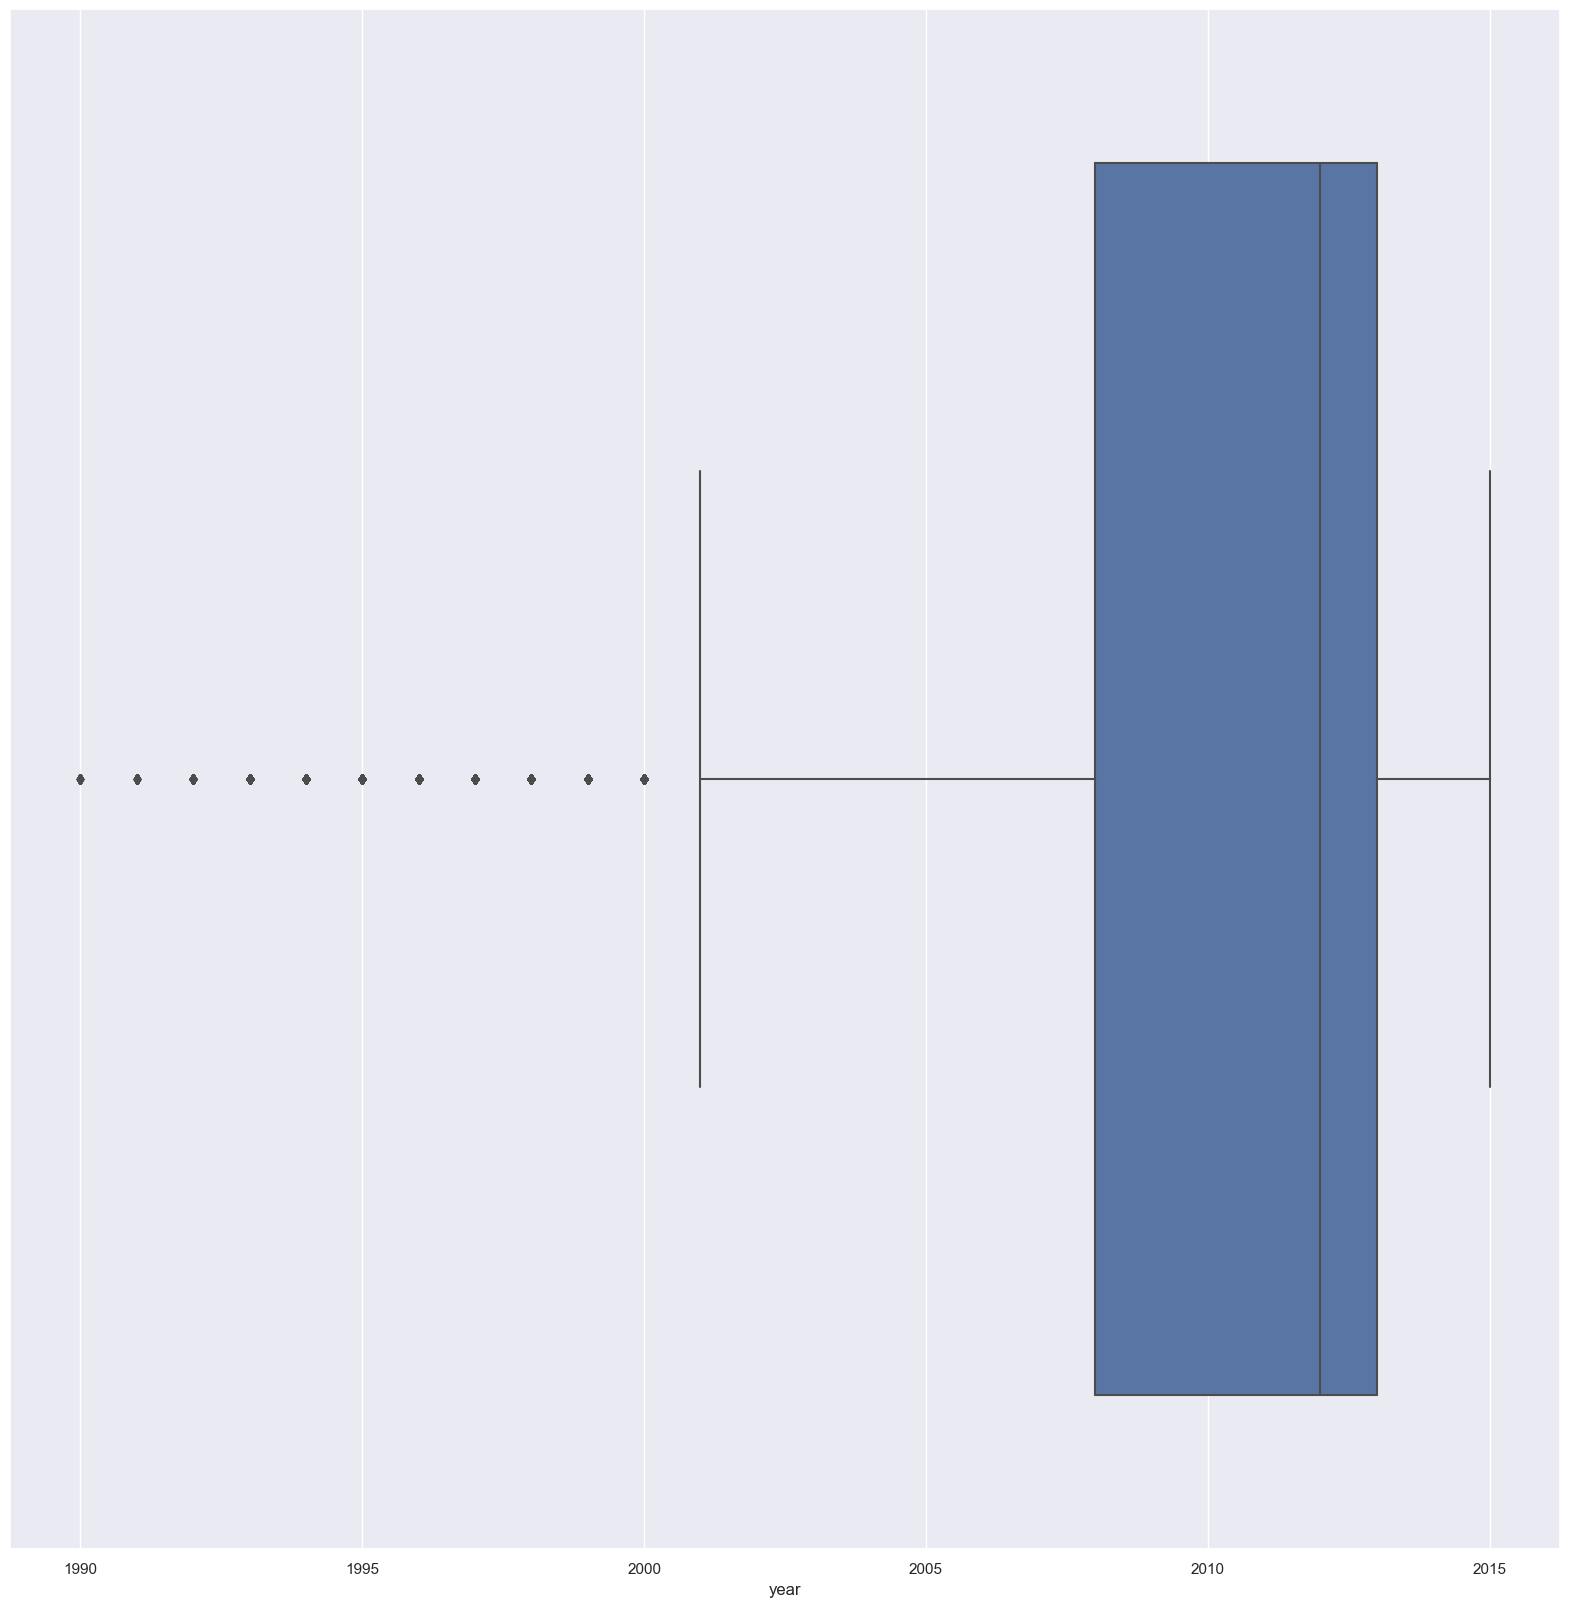

In [356]:
sns.boxplot(x='year',data=car)

<Axes: xlabel='condition'>

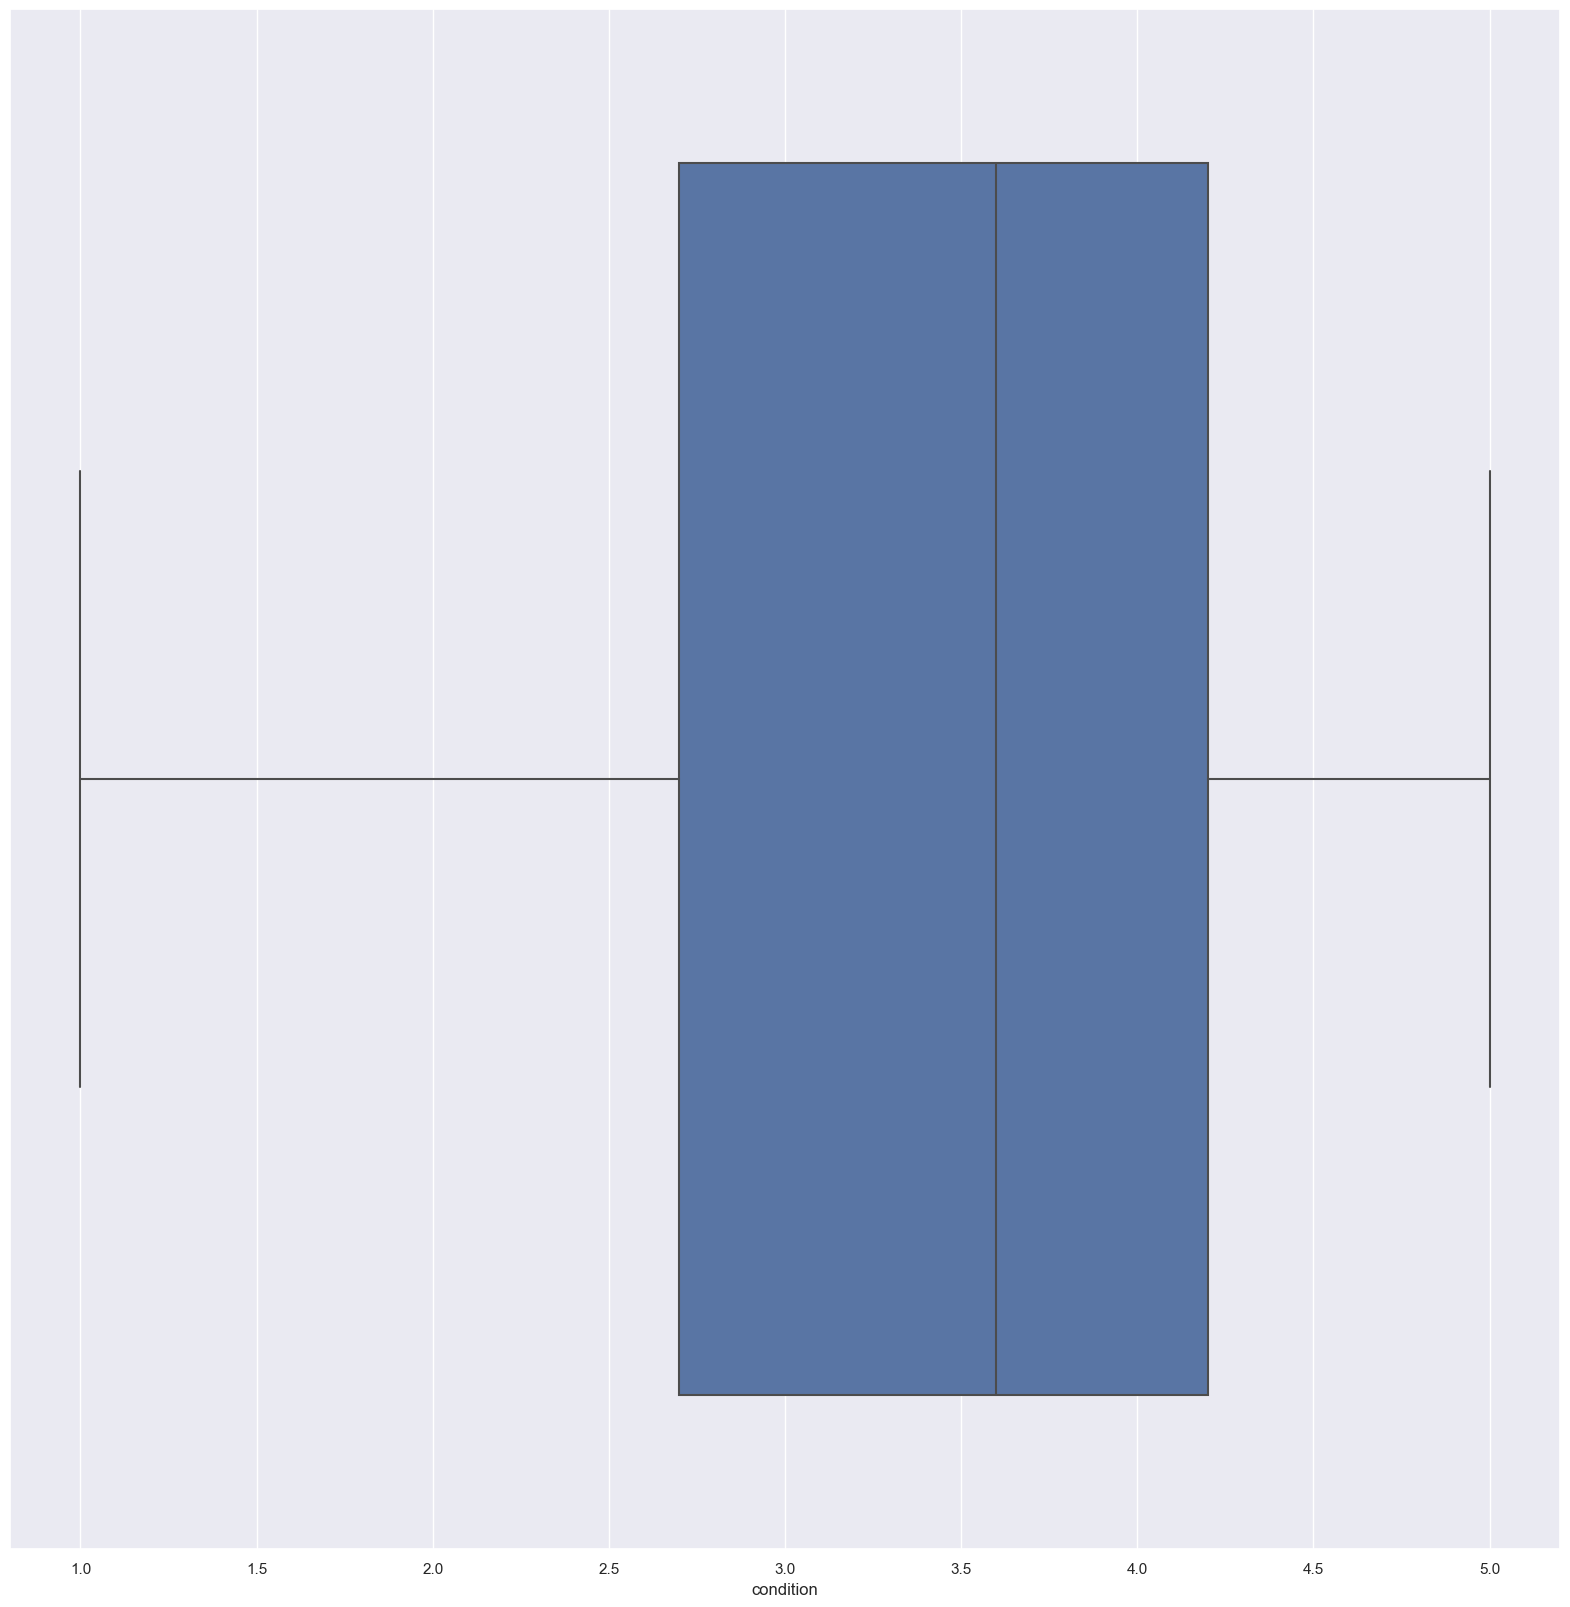

In [357]:
sns.boxplot(x='condition',data=car)

<Axes: xlabel='odometer'>

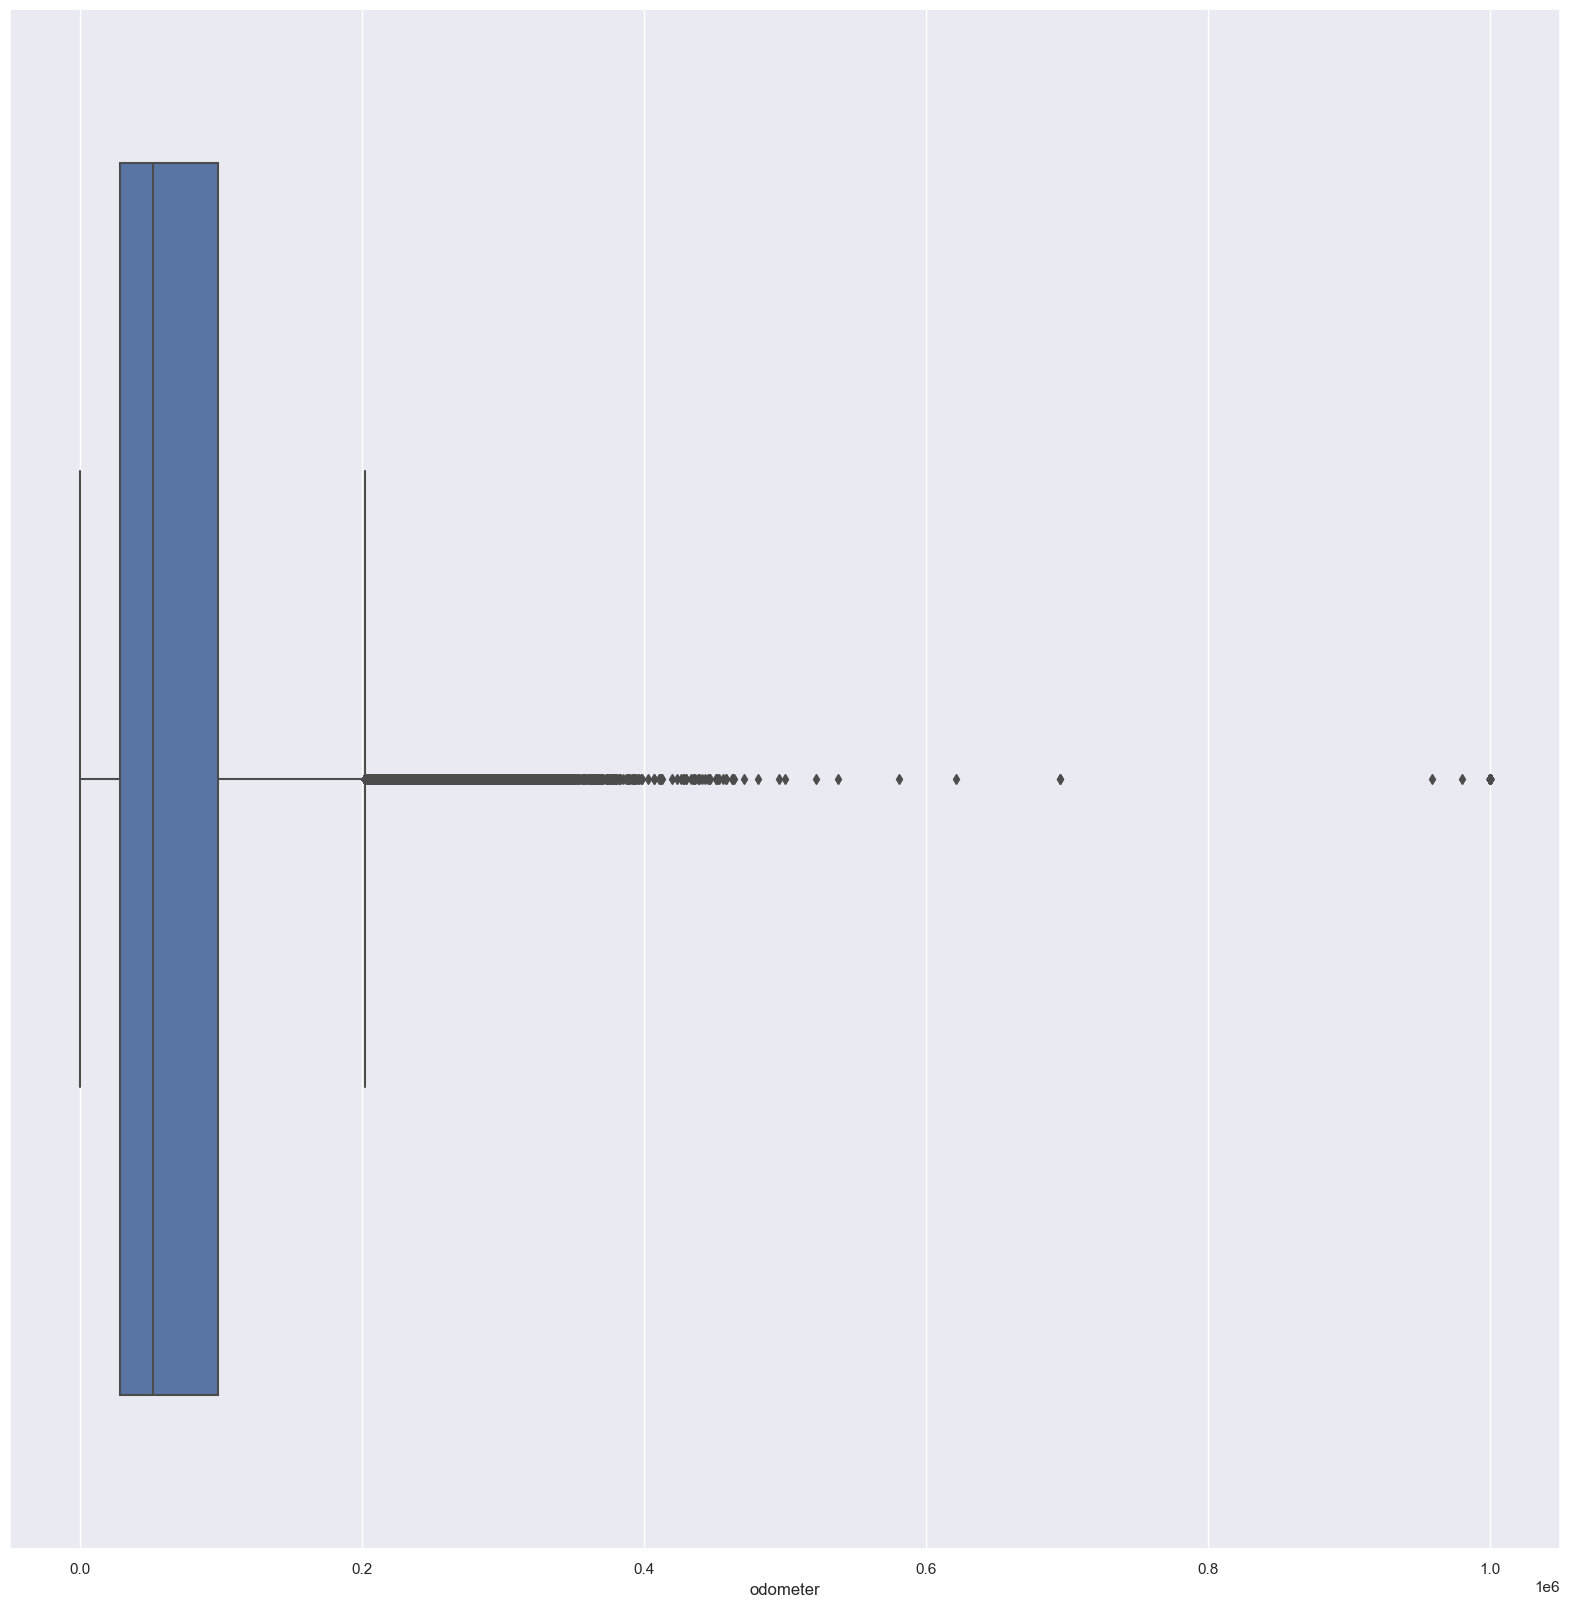

In [358]:
sns.boxplot(x='odometer',data=car)

<Axes: xlabel='mmr'>

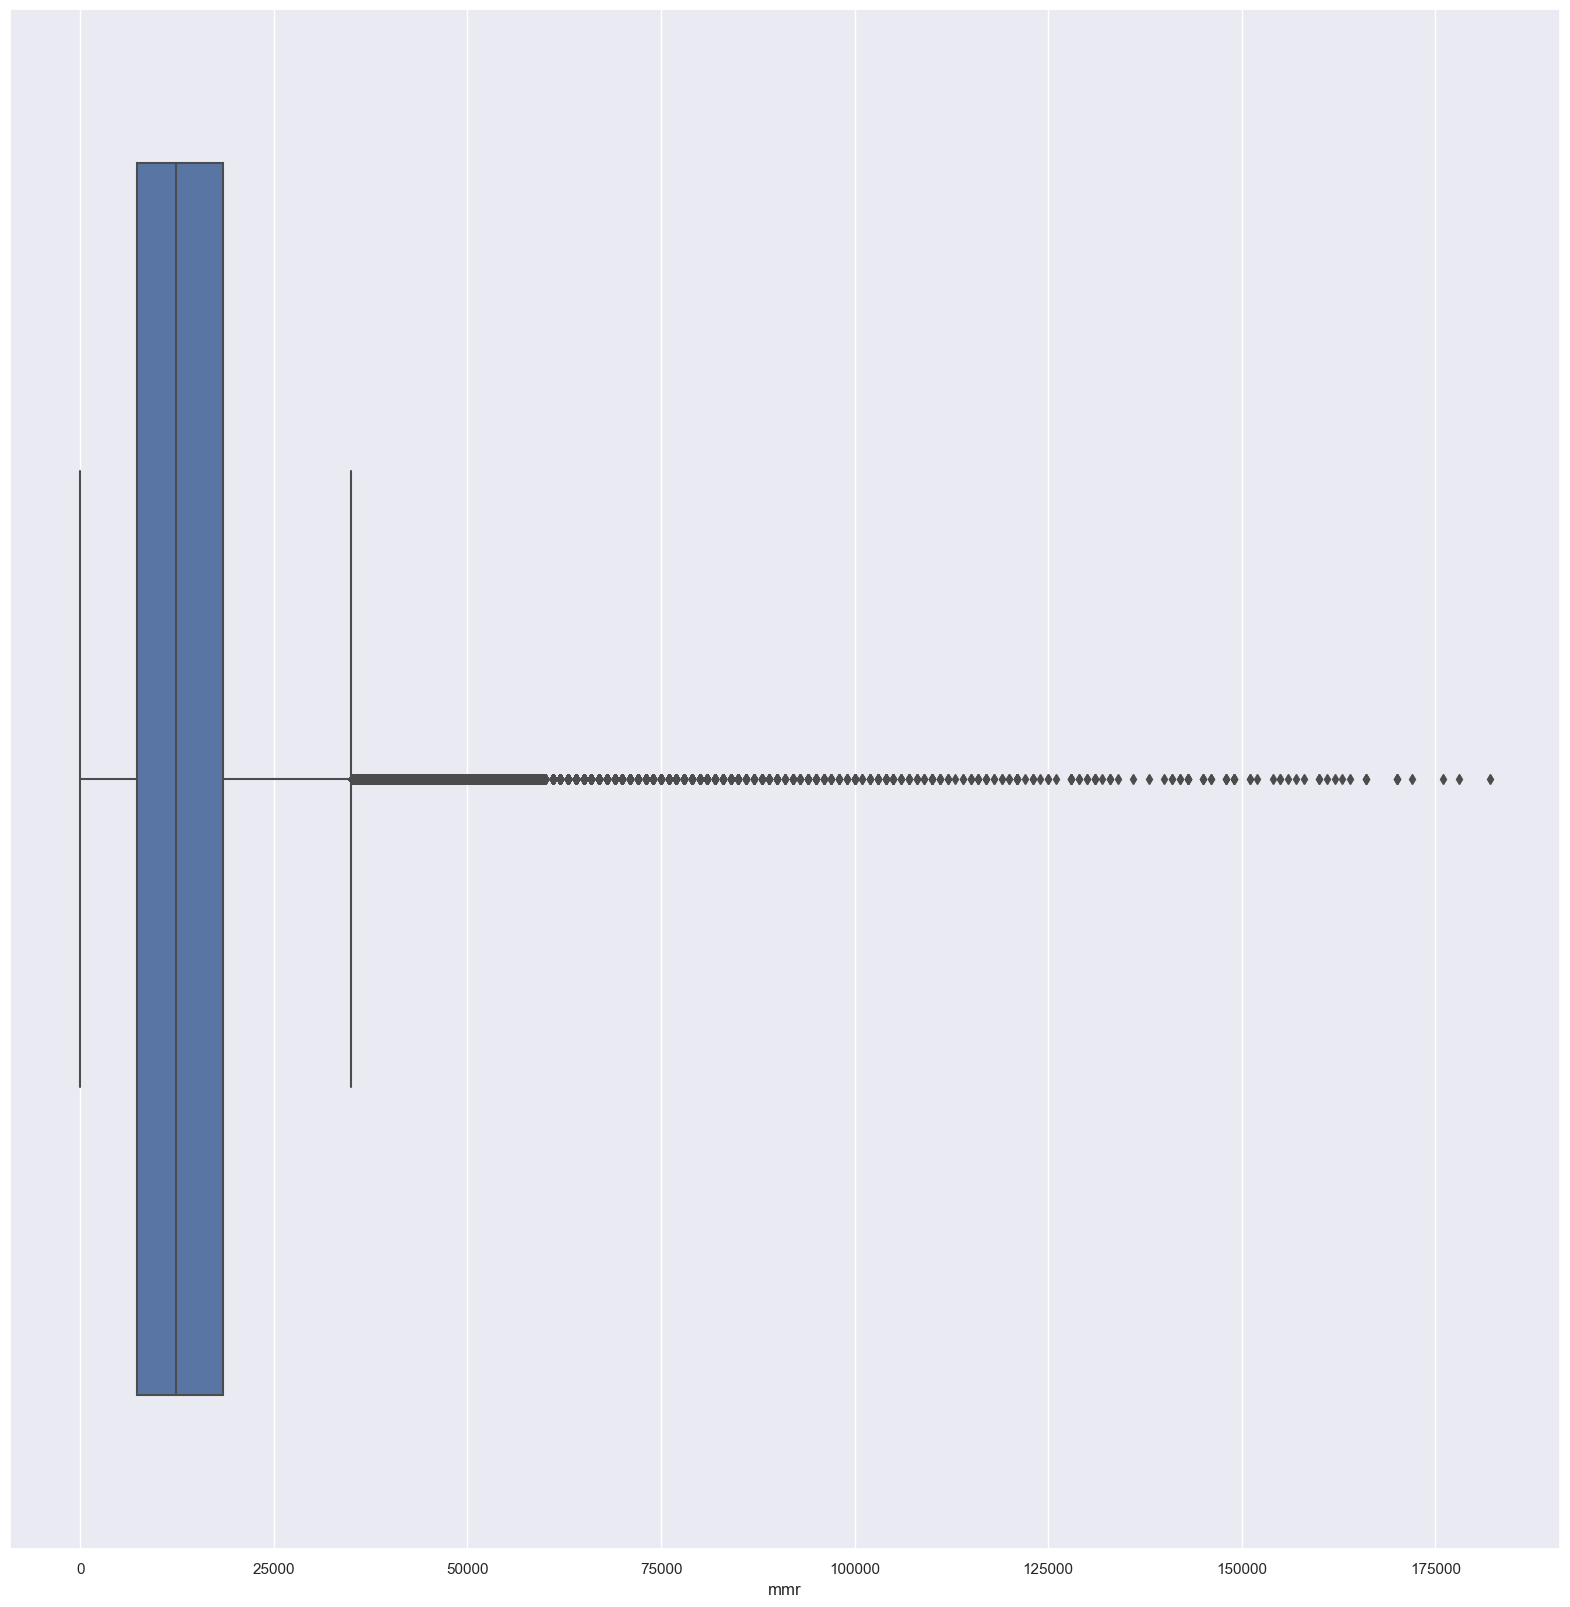

In [359]:
sns.boxplot(x='mmr',data=car)

<Axes: xlabel='sellingprice'>

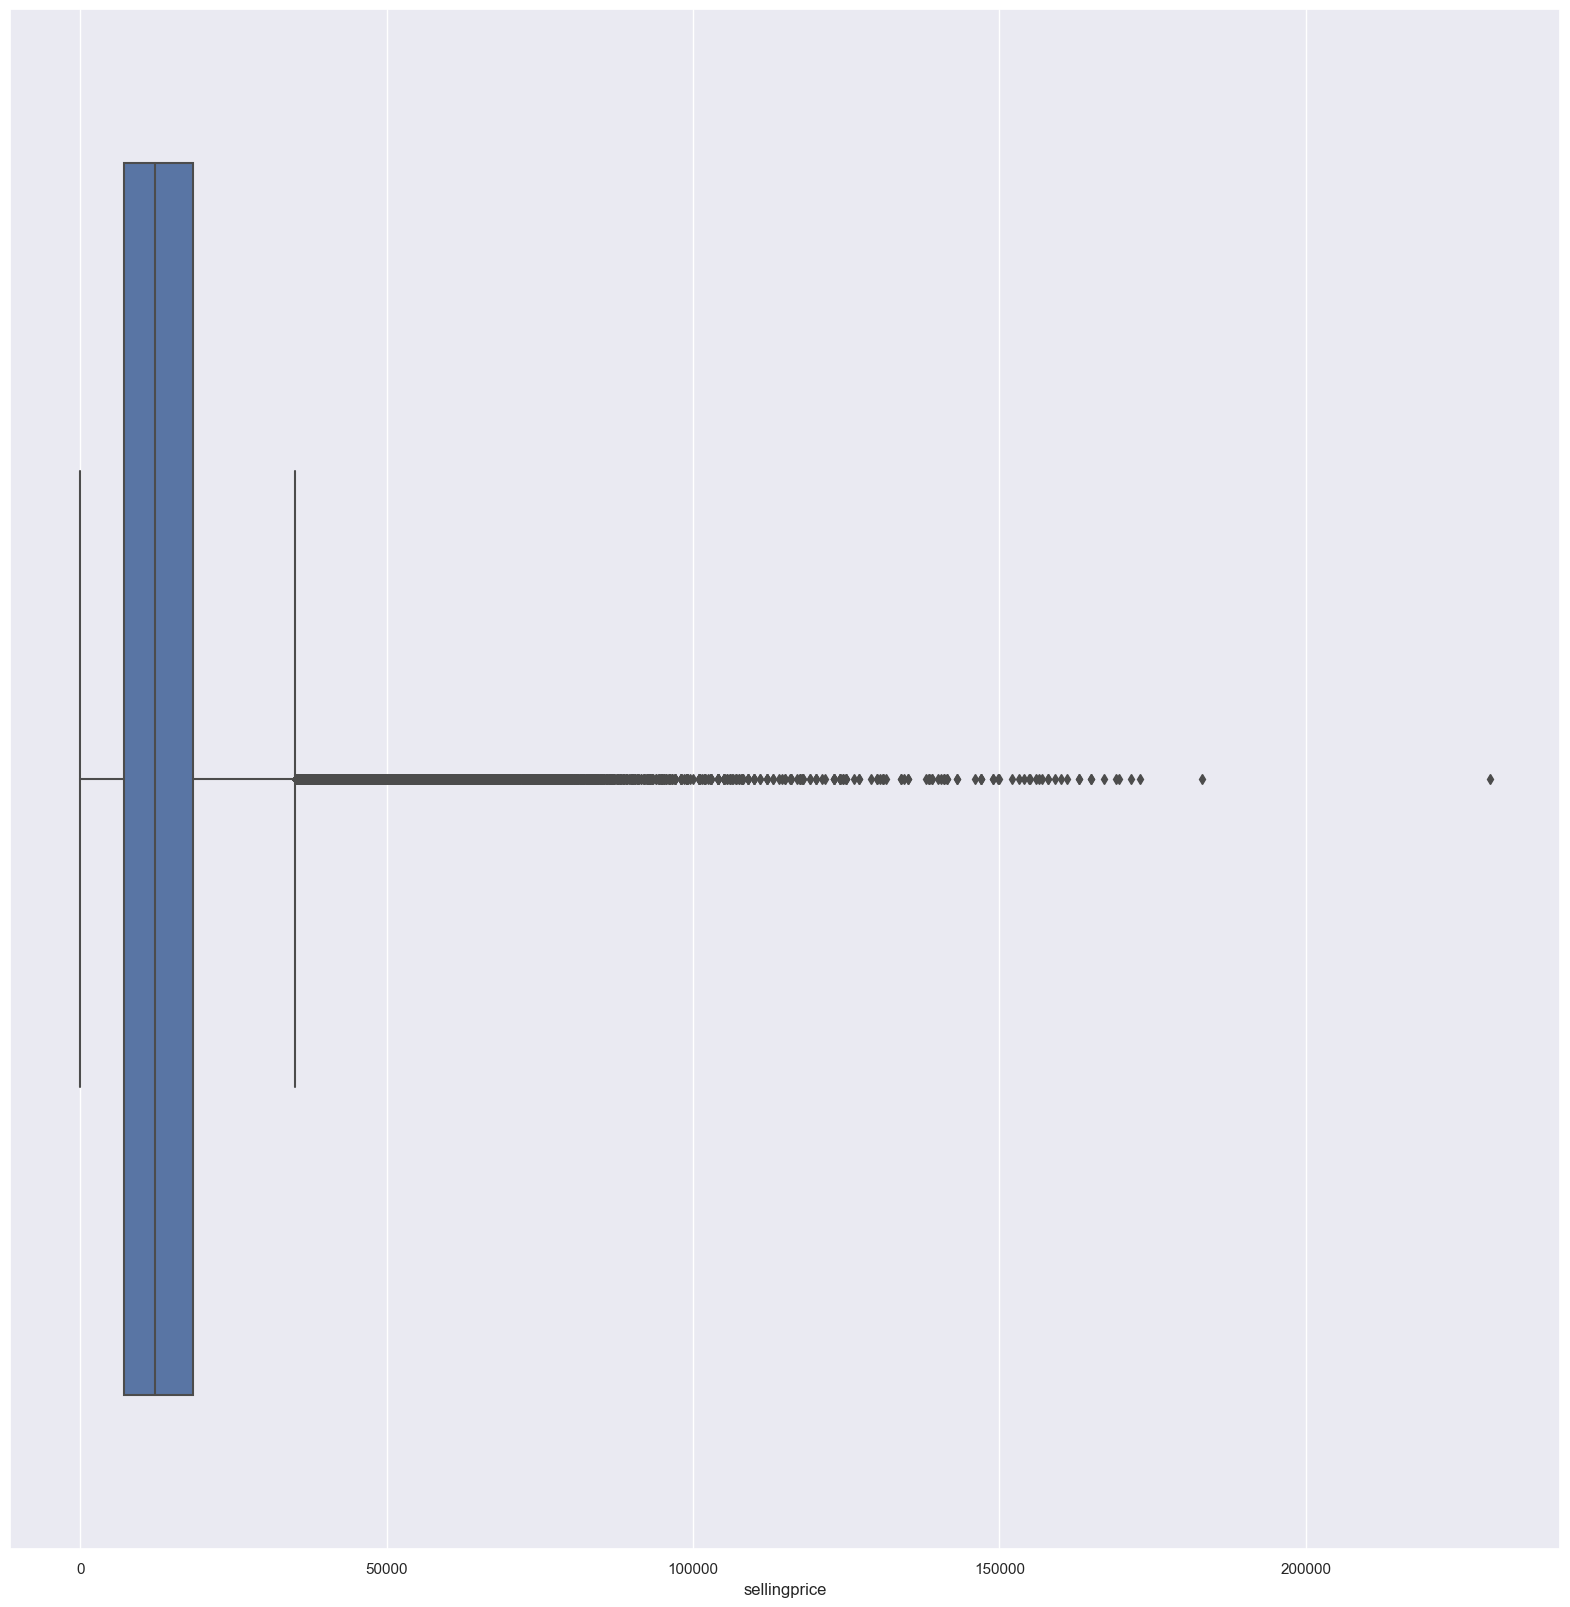

In [360]:
sns.boxplot(x='sellingprice',data=car)

In [422]:
idx=detect_outliers(car,0,['year','odometer','mmr','sellingprice'])

NameError: name 'detect_outliers' is not defined

In [423]:
idx

NameError: name 'idx' is not defined

In [424]:
outliers=car.loc[idx]
clean=car.drop(idx,axis=0)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [425]:
outliers

NameError: name 'outliers' is not defined

In [426]:
car

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Question 


## 1-most expensive car ?


In [362]:
#Q1
car[car['sellingprice']==car['sellingprice'].max()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
344905,2014,Ford,escape,titanium,suv,automatic,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000


In [363]:
#Q2
car['make'].value_counts()

Ford             93342
Chevrolet        60127
Nissan           53889
Toyota           39848
Dodge            30693
Honda            27187
Hyundai          21806
BMW              20544
Kia              18073
Chrysler         17266
Mercedes-Benz    16976
Jeep             15364
Infiniti         15291
Volkswagen       12543
Lexus            11859
GMC              10605
Mazda             8355
Cadillac          7514
Acura             5898
Audi              5853
Lincoln           5728
Buick             5096
Subaru            5041
Ram               4574
Pontiac           4489
Mitsubishi        4139
Volvo             3779
MINI              3217
Saturn            2837
Mercury           1984
Land Rover        1735
Scion             1686
Jaguar            1419
Porsche           1383
Suzuki            1072
FIAT               865
HUMMER             805
Saab               484
smart              395
Oldsmobile         364
Isuzu              204
Maserati           133
Bentley            116
Aston Marti

## 2-which make has more cars ?
 

<Axes: xlabel='count', ylabel='make'>

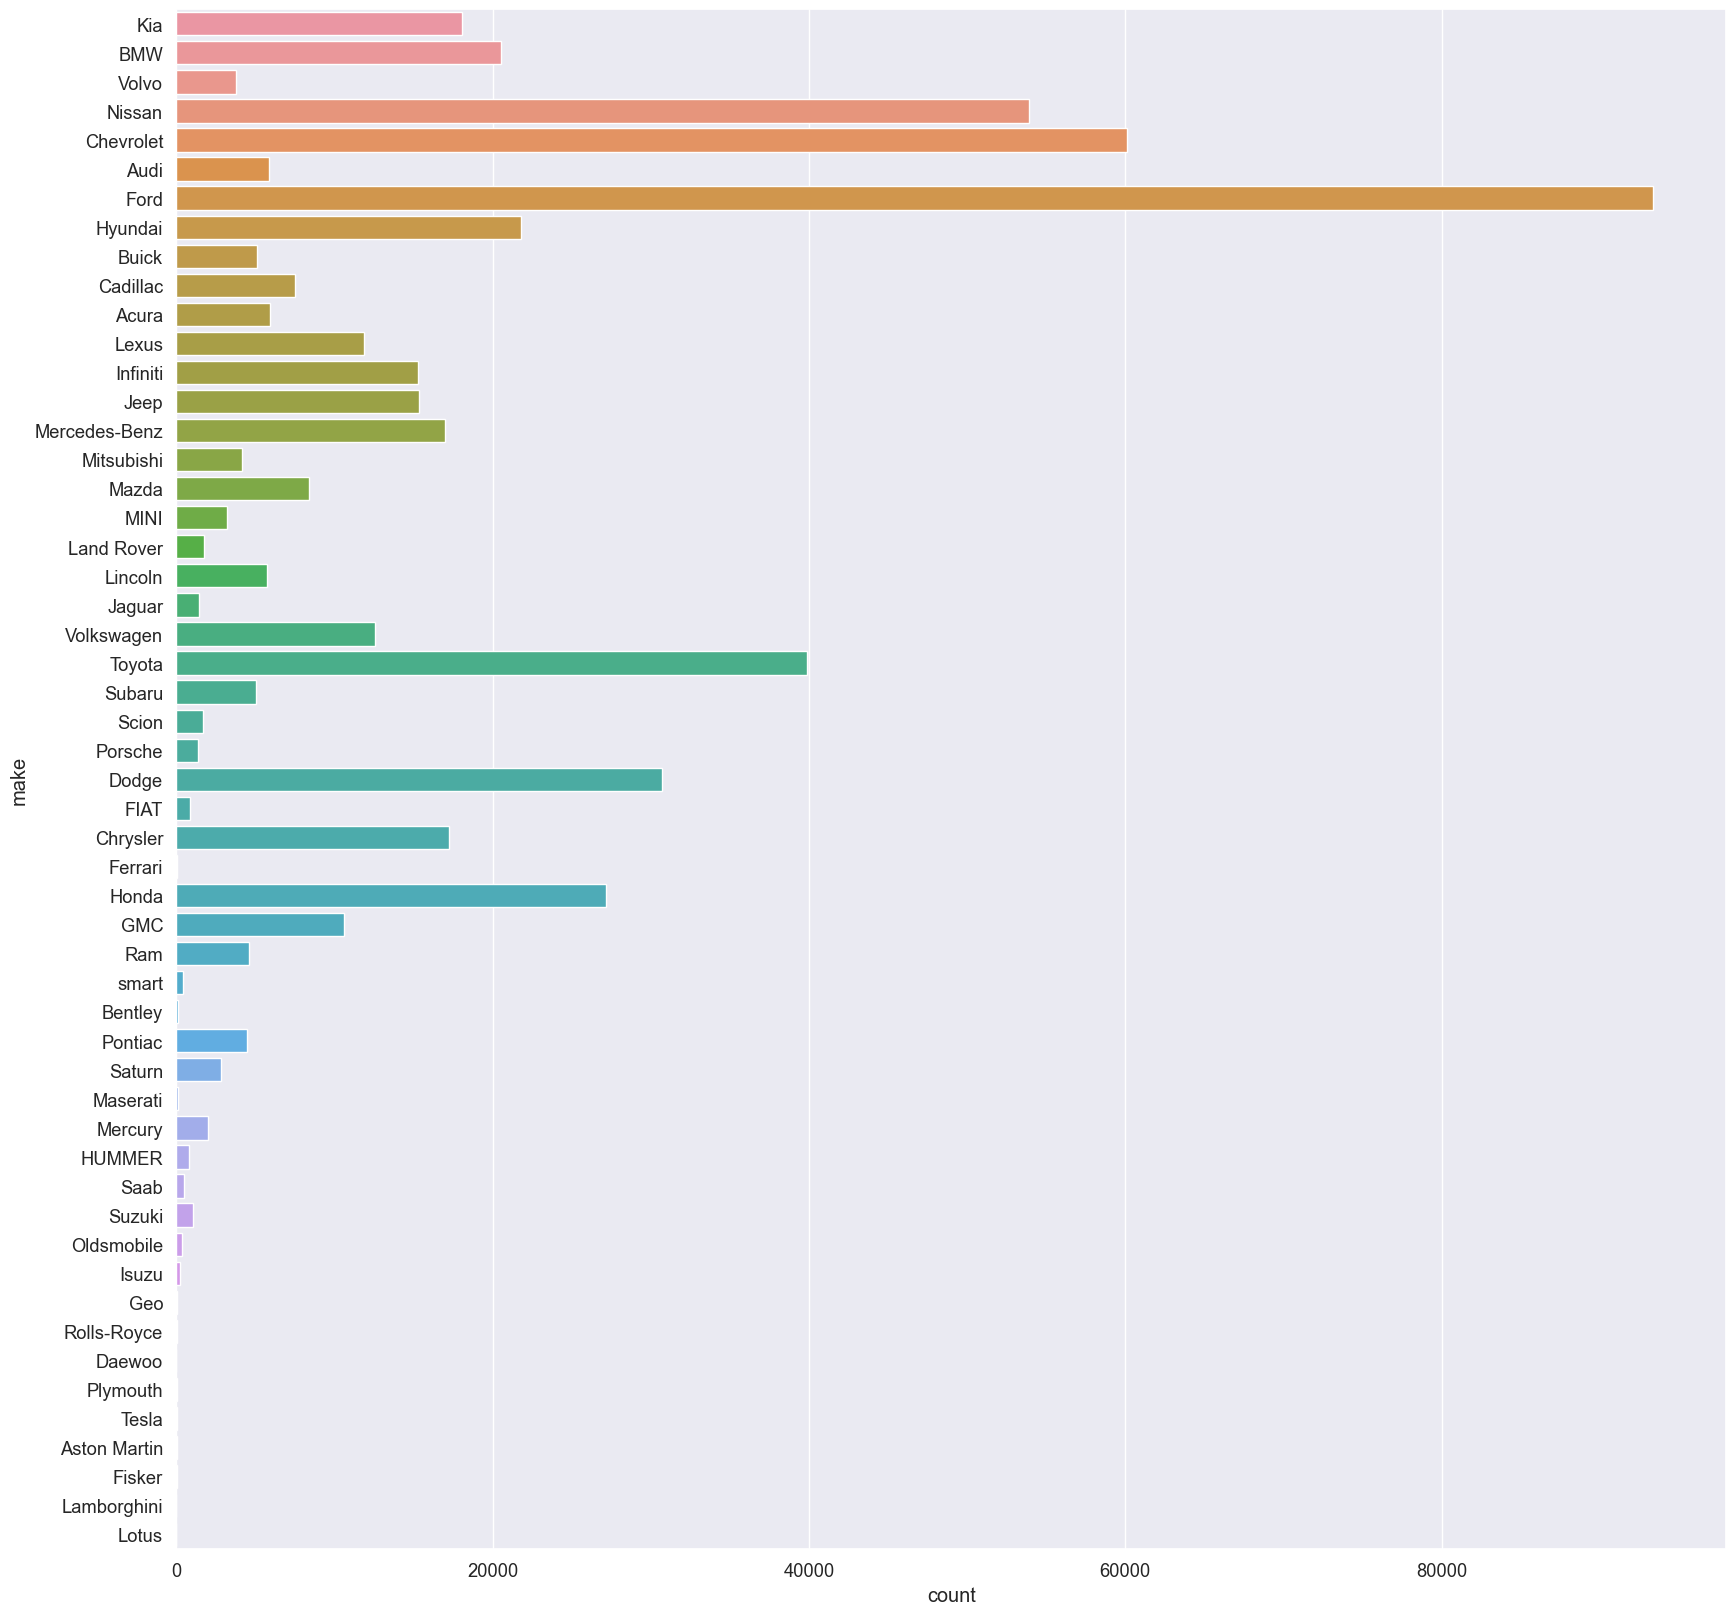

In [364]:
#Q2
sns.set(rc={'figure.figsize':[20,20]},font_scale=1.2)

sns.countplot(y='make',data=car)

## 3-what is the avg mmr ?


In [365]:
#Q3
car.groupby('mmr').mean()

C:\Users\7ob4a\AppData\Local\Temp\ipykernel_12028\70730687.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  car.groupby('mmr').mean()


,year,condition,odometer,sellingprice
mmr,,,,
25.0,2000.560000,2.148000,277477.840000,614.000000
50.0,2001.804878,2.241463,266979.487805,742.073171
75.0,2000.863636,2.159091,321492.272727,925.000000
100.0,2001.406250,2.150000,299069.375000,585.937500
125.0,2002.000000,2.145455,255062.787879,827.272727
...,...,...,...,...
170000.0,2014.333333,4.700000,1987.000000,165666.666667
172000.0,2014.000000,4.800000,124.000000,160000.000000
176000.0,2014.000000,5.000000,60.000000,165000.000000


## 4-what is 5 top expensive cars whit condition of 5 ?


In [366]:
#Q4
car[car['condition']==5].sort_values(by='mmr',ascending=False).head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
146917,2014,BMW,i8,base,coupe,automatic,ca,5.0,60.0,white,brown,ferrari of orange county,176000.0,165000
239357,2014,BMW,i8,base,coupe,automatic,fl,5.0,530.0,gray,brown,auto plaza motor sports llc,170000.0,159000
283534,2014,BMW,i8,base,coupe,automatic,fl,5.0,154.0,white,beige,american bank auto liquidators,170000.0,165000
454114,2014,Bentley,flying spur,base,sedan,automatic,pa,5.0,2343.0,gray,gray,r hollenshead auto sales inc,166000.0,153250
301118,2014,BMW,i8,base,coupe,automatic,ca,5.0,603.0,white,beige,high bid trading co inc,163000.0,158000


## 5-how many cars has odomiter less than 10k ?


In [367]:
#Q5
car[car['odometer']<10000].sort_values(by='condition')

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
354855,2014,Ford,f-150,xlt,supercrew,automatic,ca,1.0,6684.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24900.0,15700
328190,2008,Pontiac,g6,value leader,sedan,automatic,az,1.0,1.0,red,black,tio rico te ayuda-anfs inc,7275.0,775
369390,2014,Toyota,yaris,le,hatchback,automatic,nv,1.0,1.0,blue,black,hertz/tra,11000.0,5200
506514,2000,Mitsubishi,galant,es,sedan,automatic,sc,1.0,1.0,black,gray,motors acceptance corporation,925.0,150
6018,2014,Toyota,camry,le,sedan,automatic,ca,1.0,6046.0,white,gray,fox rent a car tra,16700.0,8700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254999,2015,Kia,sorento,lx,suv,automatic,wa,5.0,5474.0,silver,black,"kia motors america, inc",21600.0,21600
255001,2015,Kia,sorento,lx,suv,automatic,wa,5.0,5780.0,black,gray,"kia motors america, inc",21600.0,21500
255004,2015,Kia,sorento,lx,suv,automatic,wa,5.0,8842.0,gray,gray,"kia motors america, inc",21200.0,20900
254983,2015,Kia,sorento,lx,suv,automatic,wa,5.0,6305.0,black,gray,"kia motors america, inc",21500.0,21600


## 6-what is the avg price of cars of each make for each conditon ?


In [368]:
#Q6
x=pd.pivot_table(index='make',columns='condition',values='sellingprice',data=car,aggfunc=np.mean)

In [369]:
x

condition,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
make,,,,,,,,,,,,,,,,,,,,,
Acura,1798.000000,NaN,NaN,900.000000,NaN,NaN,3300.000000,5750.000000,6700.000000,5425.797448,...,20025.563910,20202.027027,21748.717949,22873.033708,23190.104167,24622.727273,24675.000000,25081.250000,25738.541667,27680.000000
Aston Martin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52000.000000,48950.000000,NaN,53500.000000,NaN,68000.000000,NaN,54000.000000,61000.000000,NaN
Audi,3002.500000,1800.000000,2500.000000,1900.000000,NaN,2500.000000,NaN,8500.000000,900.000000,8158.449721,...,25442.592593,26657.692308,28301.515152,30526.033058,31087.903226,32198.449612,33870.901639,35409.057971,36673.913043,35178.014184
BMW,4326.250000,6437.500000,3850.000000,5450.000000,1400.000000,NaN,3912.500000,3681.250000,3900.000000,6872.873346,...,25985.842407,27681.558935,28301.470182,29681.987002,32084.349920,32100.588926,33456.523643,34356.750466,36824.431818,39812.094907
Bentley,NaN,NaN,43000.000000,NaN,NaN,NaN,NaN,NaN,NaN,64500.000000,...,64416.666667,75590.909091,95200.000000,102350.000000,111750.000000,79833.333333,80000.000000,95250.000000,93666.666667,94750.000000
Buick,2769.347826,1850.000000,1850.000000,4400.000000,NaN,NaN,2300.000000,2000.000000,2687.500000,2899.141935,...,14650.564972,15514.655172,15832.801075,16860.317460,16788.213483,16383.050847,18116.447368,19233.571429,18648.913043,21008.783505
Cadillac,1668.287037,1250.000000,2862.500000,NaN,525.000000,5800.000000,12250.000000,5716.666667,6100.000000,5061.448041,...,19965.054745,23121.975779,22594.620253,22490.271812,24145.616000,25451.470588,24719.379845,24945.041322,27162.135922,33011.764706
Chevrolet,4582.514932,3636.363636,2350.000000,3291.666667,2425.000000,3108.333333,3929.807692,2925.000000,3507.608696,4795.236126,...,15549.436355,16318.537823,16950.406738,17481.799370,18230.408898,18537.371996,20020.435504,21723.503326,22750.476744,24842.063492
Chrysler,4826.355932,1500.000000,1775.000000,1916.666667,2559.090909,2962.500000,2853.571429,3058.333333,3409.615385,3657.519348,...,13501.812877,14680.393443,15459.527728,15920.358643,17093.189369,16938.779592,17333.600000,17545.352713,19588.398204,19270.039256


## 7-how many cars have codition more than 4.5 and what is thir avg price ?


In [370]:
#Q7
car[car['condition']>4.5]['sellingprice'].mean()

22060.84251667304

## 8-what is the max and min sellingprice whit thier condition ?


In [371]:
#Q8
car.groupby('sellingprice').describe()['condition']

,count,mean,std,min,25%,50%,75%,max
sellingprice,,,,,,,,
1,3.0,2.400000,1.571623,1.0,1.55,2.1,3.1,4.1
100,16.0,1.518750,0.515388,1.0,1.00,1.6,1.9,2.5
150,18.0,1.938889,0.542477,1.0,1.90,2.0,2.0,3.0
175,10.0,1.920000,1.003106,1.0,1.00,2.0,2.0,3.6
200,173.0,1.929480,0.814761,1.0,1.00,2.0,2.0,3.6
...,...,...,...,...,...,...,...,...
169500,1.0,4.500000,NaN,4.5,4.50,4.5,4.5,4.5
171500,1.0,4.200000,NaN,4.2,4.20,4.2,4.2,4.2
173000,1.0,4.100000,NaN,4.1,4.10,4.1,4.1,4.1


In [372]:
#Q8
car.groupby('sellingprice').min()['condition']

sellingprice
1         1.0
100       1.0
150       1.0
175       1.0
200       1.0
         ... 
169500    4.5
171500    4.2
173000    4.1
183000    4.6
230000    4.3
Name: condition, Length: 1869, dtype: float64

In [373]:
#Q8
car.groupby('sellingprice').max()['condition']

sellingprice
1         4.1
100       2.5
150       3.0
175       3.6
200       3.6
         ... 
169500    4.5
171500    4.2
173000    4.1
183000    4.6
230000    4.3
Name: condition, Length: 1869, dtype: float64

## 9-the corr between odomiter and sellingprice ?


In [374]:
#Q9
car.corr()

C:\Users\7ob4a\AppData\Local\Temp\ipykernel_12028\2182477985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.corr()


,year,condition,odometer,mmr,sellingprice
year,1.000000,0.529688,-0.775911,0.595779,0.585583
condition,0.529688,1.000000,-0.520695,0.472896,0.527043
odometer,-0.775911,-0.520695,1.000000,-0.586497,-0.580808
mmr,0.595779,0.472896,-0.586497,1.000000,0.983518
sellingprice,0.585583,0.527043,-0.580808,0.983518,1.000000


In [375]:
#Q9
car.corr()['sellingprice']

C:\Users\7ob4a\AppData\Local\Temp\ipykernel_12028\241238687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.corr()['sellingprice']


year            0.585583
condition       0.527043
odometer       -0.580808
mmr             0.983518
sellingprice    1.000000
Name: sellingprice, dtype: float64

C:\Users\7ob4a\AppData\Local\Temp\ipykernel_12028\3887511395.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(),annot=True)


<Axes: >

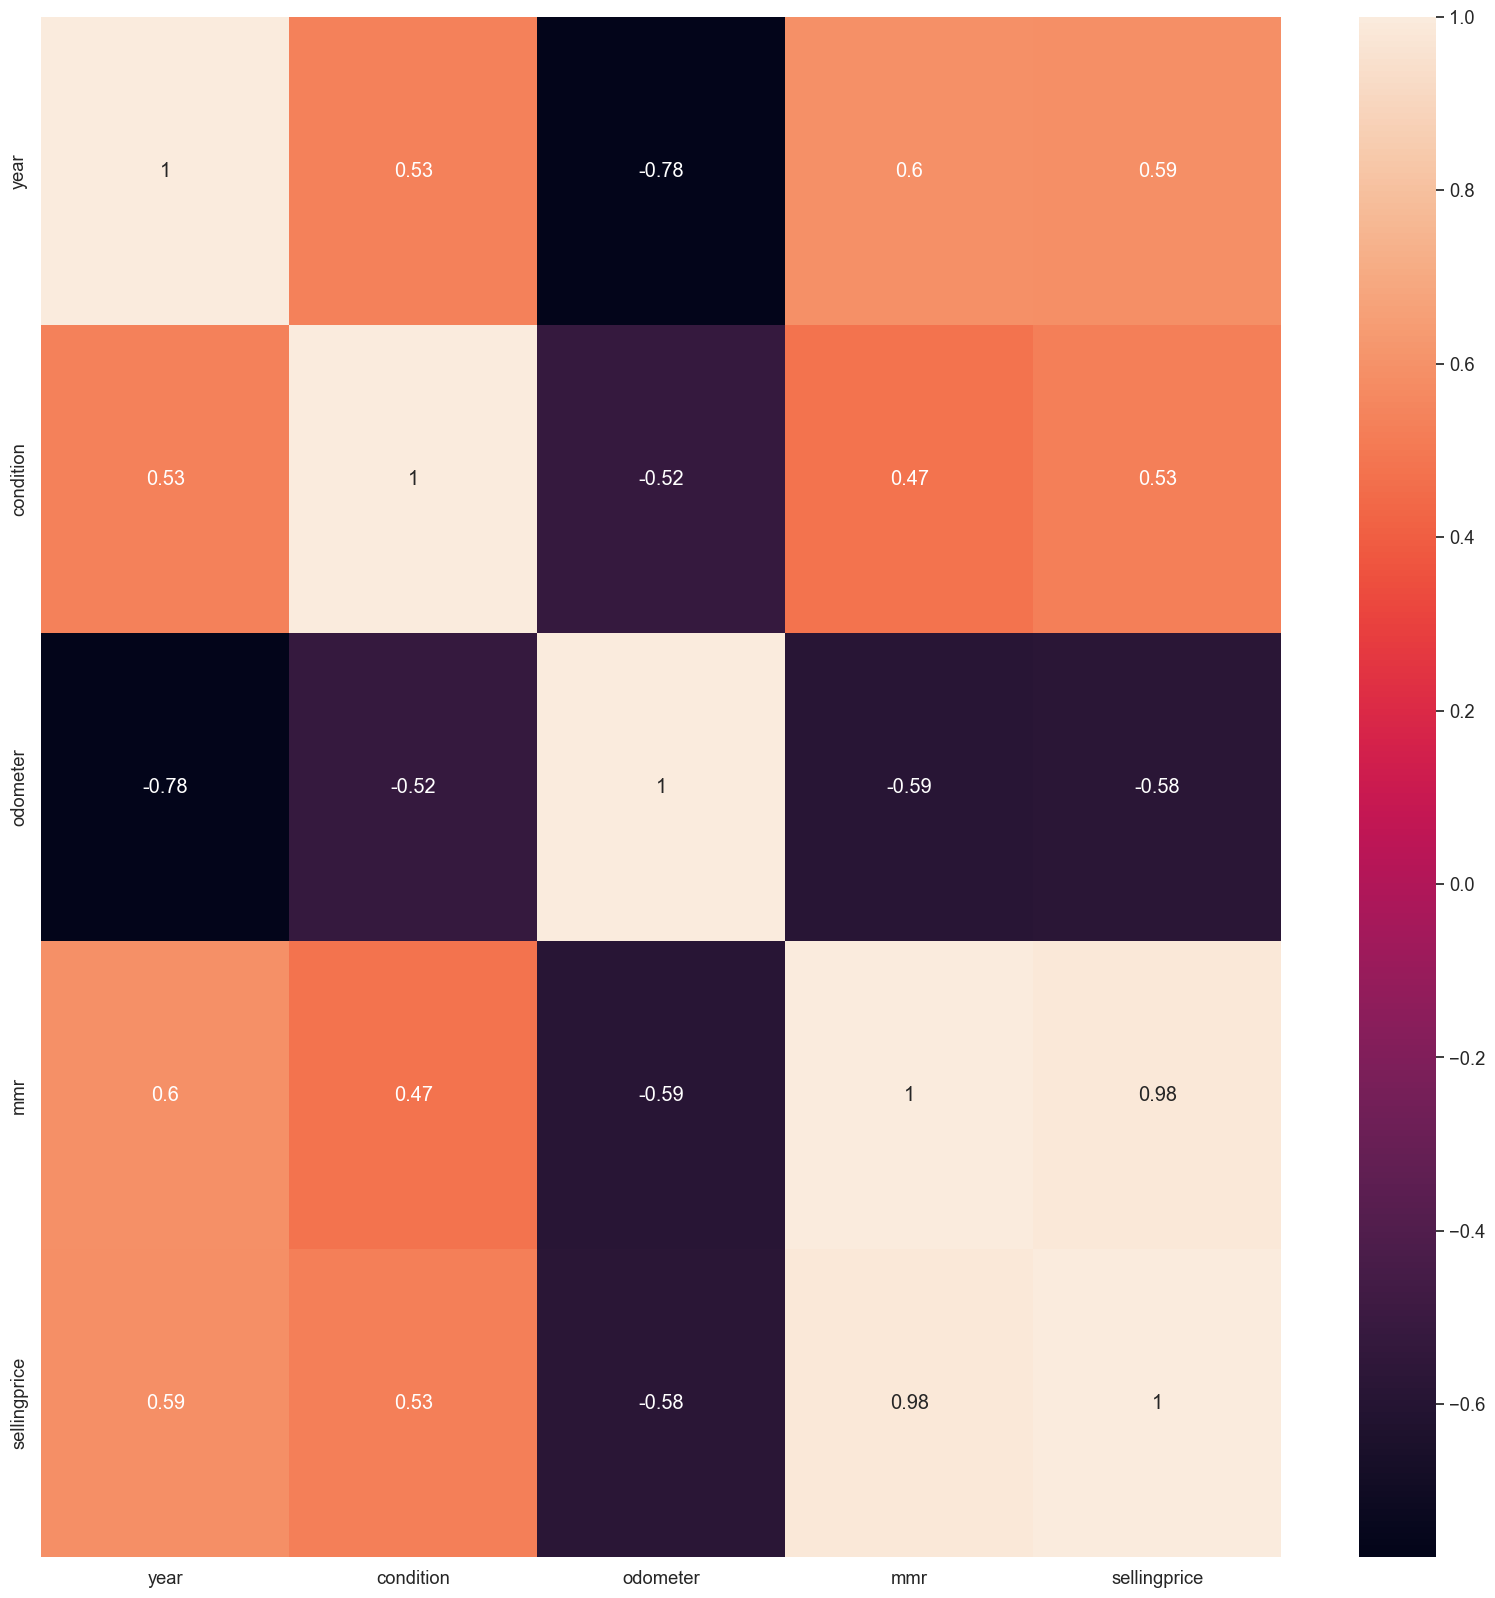

In [376]:
#Q9
sns.heatmap(car.corr(),annot=True)

## 10-how many cars for each make for each transmation ?


In [377]:
#Q10
x=pd.pivot_table(index='make',columns='transmission',values='condition',data=car,aggfunc='count')

In [378]:
x

transmission,automatic,manual
make,,
Acura,5728.0,170.0
Aston Martin,20.0,5.0
Audi,5496.0,357.0
BMW,19717.0,827.0
Bentley,116.0,NaN
Buick,5086.0,10.0
Cadillac,7467.0,47.0
Chevrolet,58829.0,1298.0
Chrysler,17179.0,87.0


<Axes: xlabel='transmission', ylabel='make'>

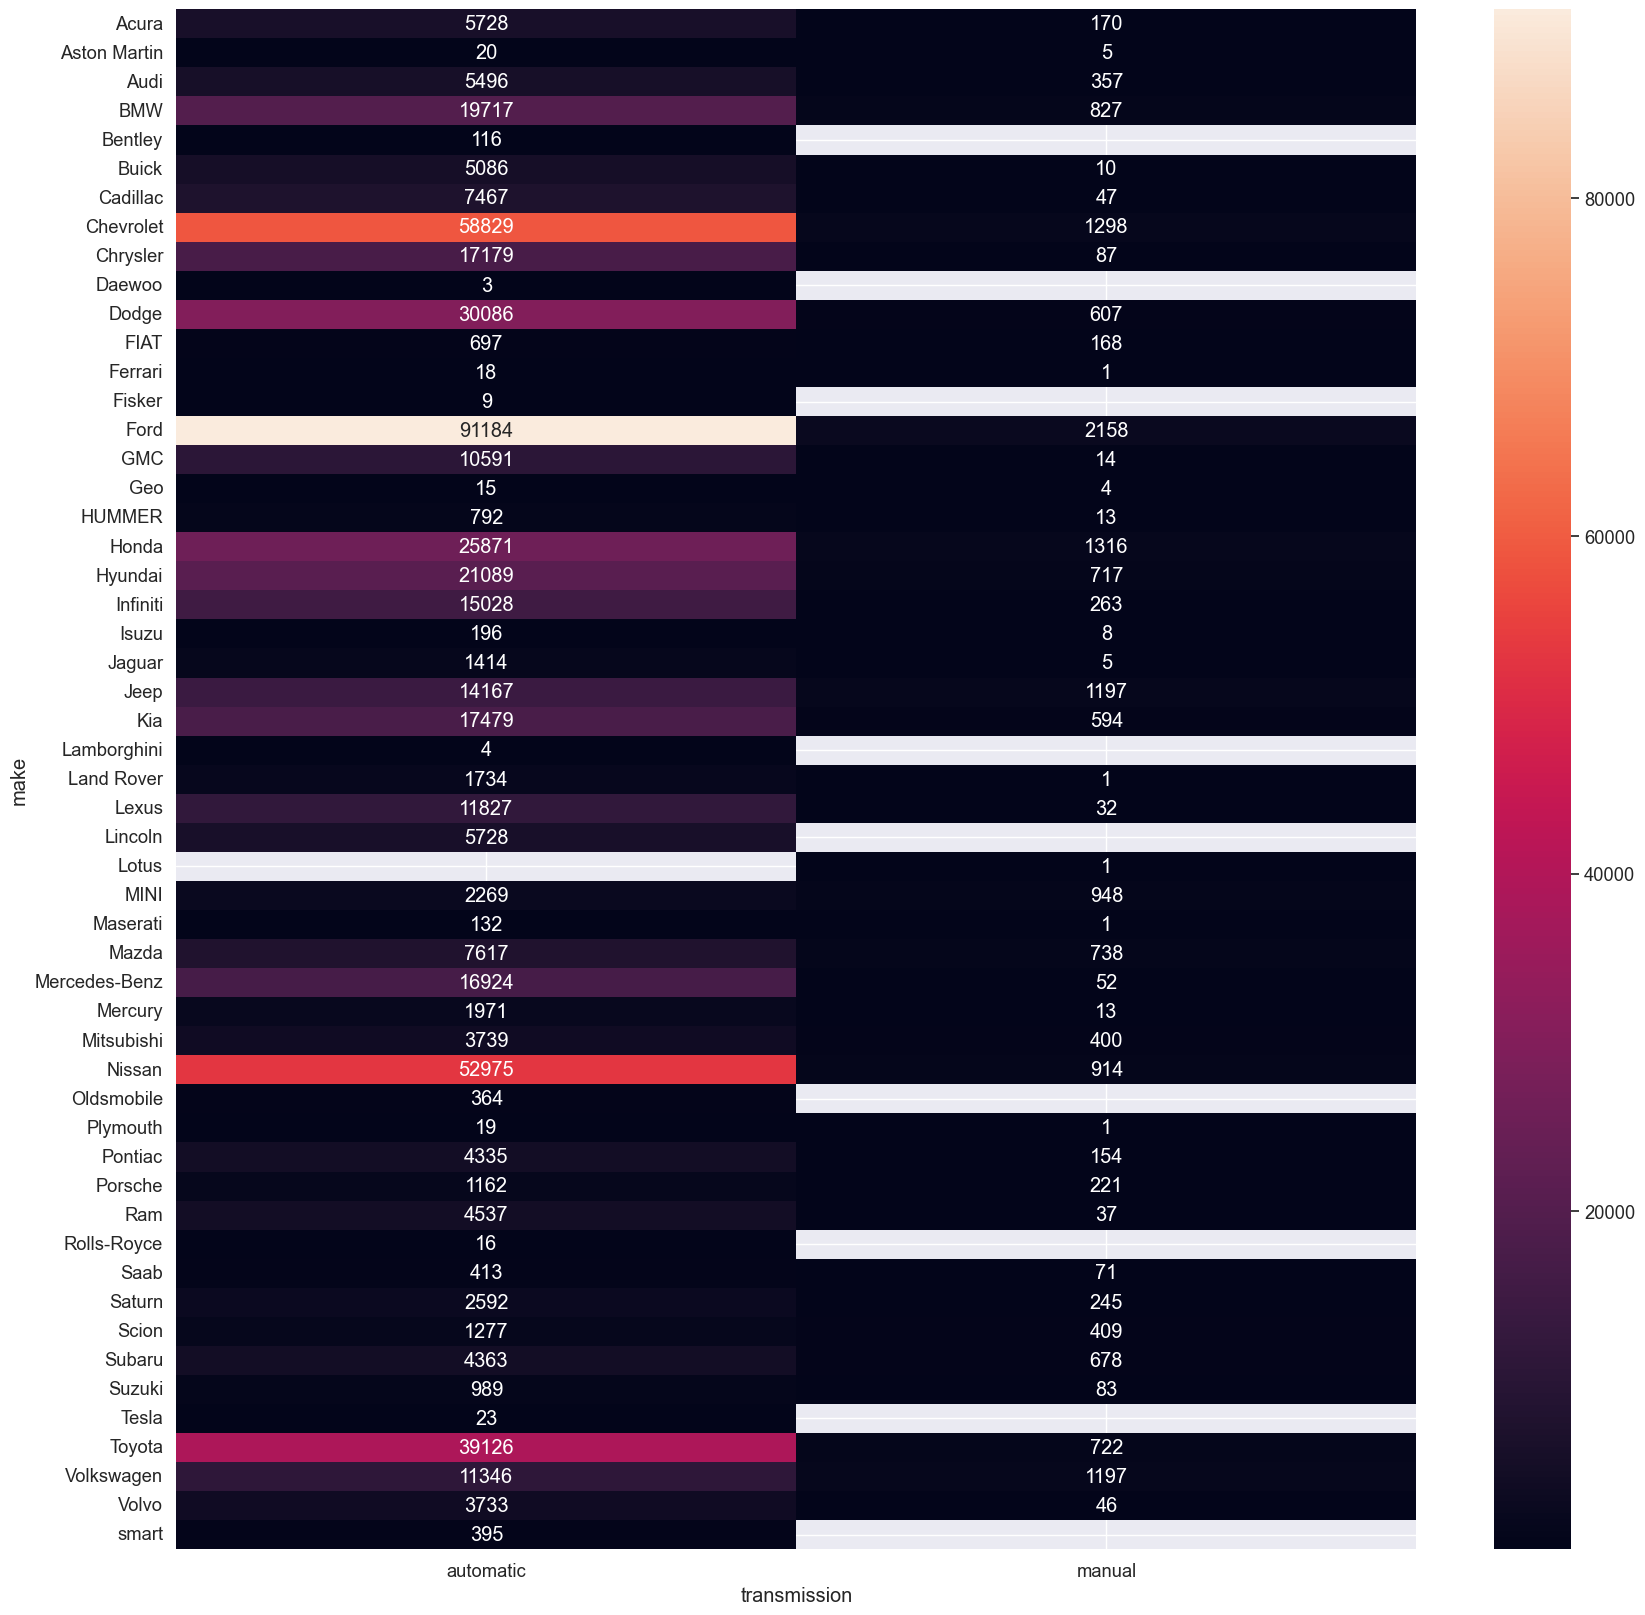

In [379]:
#Q10
sns.heatmap(x,annot=True,fmt='0.0f')

## 11-how many cars with an suv body ?


In [380]:
#Q11
car['body'].value_counts()

sedan                      240863
suv                        143674
hatchback                   26199
minivan                     25508
coupe                       17705
crew cab                    16383
wagon                       16104
convertible                 10427
supercrew                    9021
g sedan                      7412
supercab                     5301
regular cab                  4836
van                          4524
extended cab                 4498
quad cab                     4094
e-series van                 1823
double cab                   1601
g coupe                      1593
crewmax cab                   565
king cab                      532
g convertible                 323
genesis coupe                 294
access cab                    293
koup                          180
club cab                      178
cts coupe                     158
mega cab                      111
elantra coupe                 103
promaster cargo van            59
beetle convert

<Axes: xlabel='body', ylabel='count'>

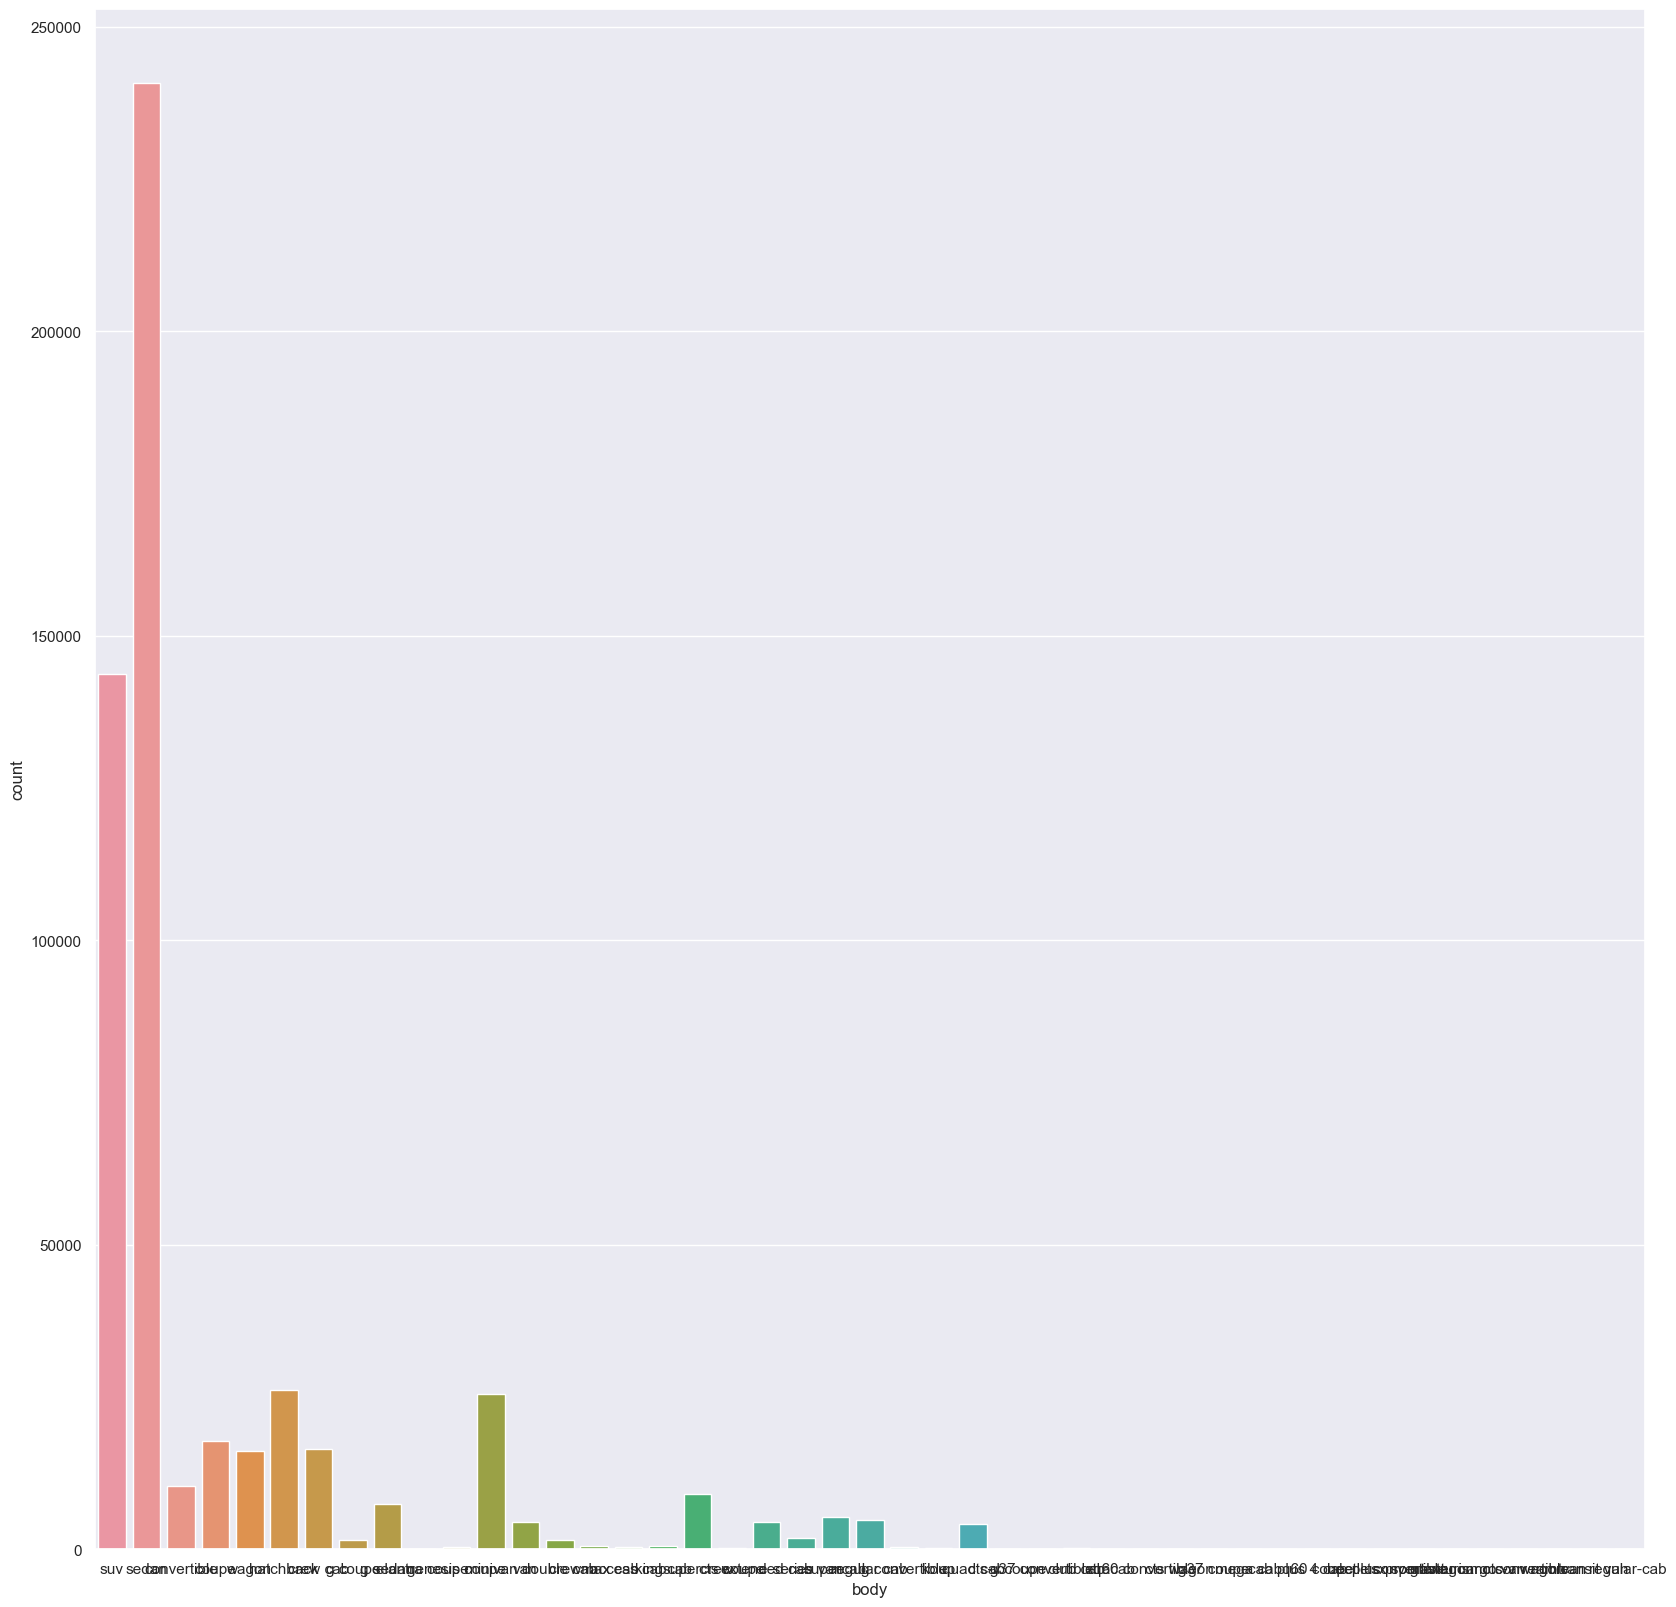

In [381]:
#Q11
sns.set(rc={'figure.figsize':[20,20]},font_scale=1.0)
sns.countplot(x='body',data=car)

## 12-what is the avg price pased on year ?


In [382]:
#Q12
avg_price_year=car.groupby('year')['sellingprice'].mean()
print(avg_price_year)

year
1990     1465.909091
1991      959.583333
1992      889.669421
1993      714.786585
1994      828.550725
1995      858.794165
1996      896.467391
1997     1062.442485
1998     1236.221311
1999     1481.700454
2000     1743.616799
2001     2137.013444
2002     2627.102004
2003     3342.302210
2004     4257.391567
2005     4871.959650
2006     6023.865054
2007     7958.454717
2008     9541.406518
2009    10463.581569
2010    12465.406396
2011    15878.008366
2012    16592.416704
2013    17459.817875
2014    20017.087734
2015    26005.722095
Name: sellingprice, dtype: float64


## 13-what is the distribution of condition in the dataset ?


In [383]:
# Q13
condition_count = car['condition'].value_counts()
print(condition_count)

1.9    40404
3.6    33779
3.5    26185
3.7    25472
4.4    25167
4.3    24651
4.2    24038
4.1    22743
3.9    19647
4.0    19620
2.0    19590
2.8    18638
2.9    18409
3.8    18393
3.4    17000
2.7    15789
4.9    12872
4.8    12542
4.6    12472
4.5    12146
2.5    12133
2.6    11548
4.7    11216
5.0    11025
3.0    10474
3.3    10361
3.2     9719
2.4     9033
3.1     9002
2.1     8817
2.3     7886
1.0     6892
2.2     5831
1.8      311
1.7      224
1.6      169
1.5      133
1.4      127
1.2       94
1.1       86
1.3       79
Name: condition, dtype: int64


## 14-how to visualiza the above car conditions as a pie chart ?


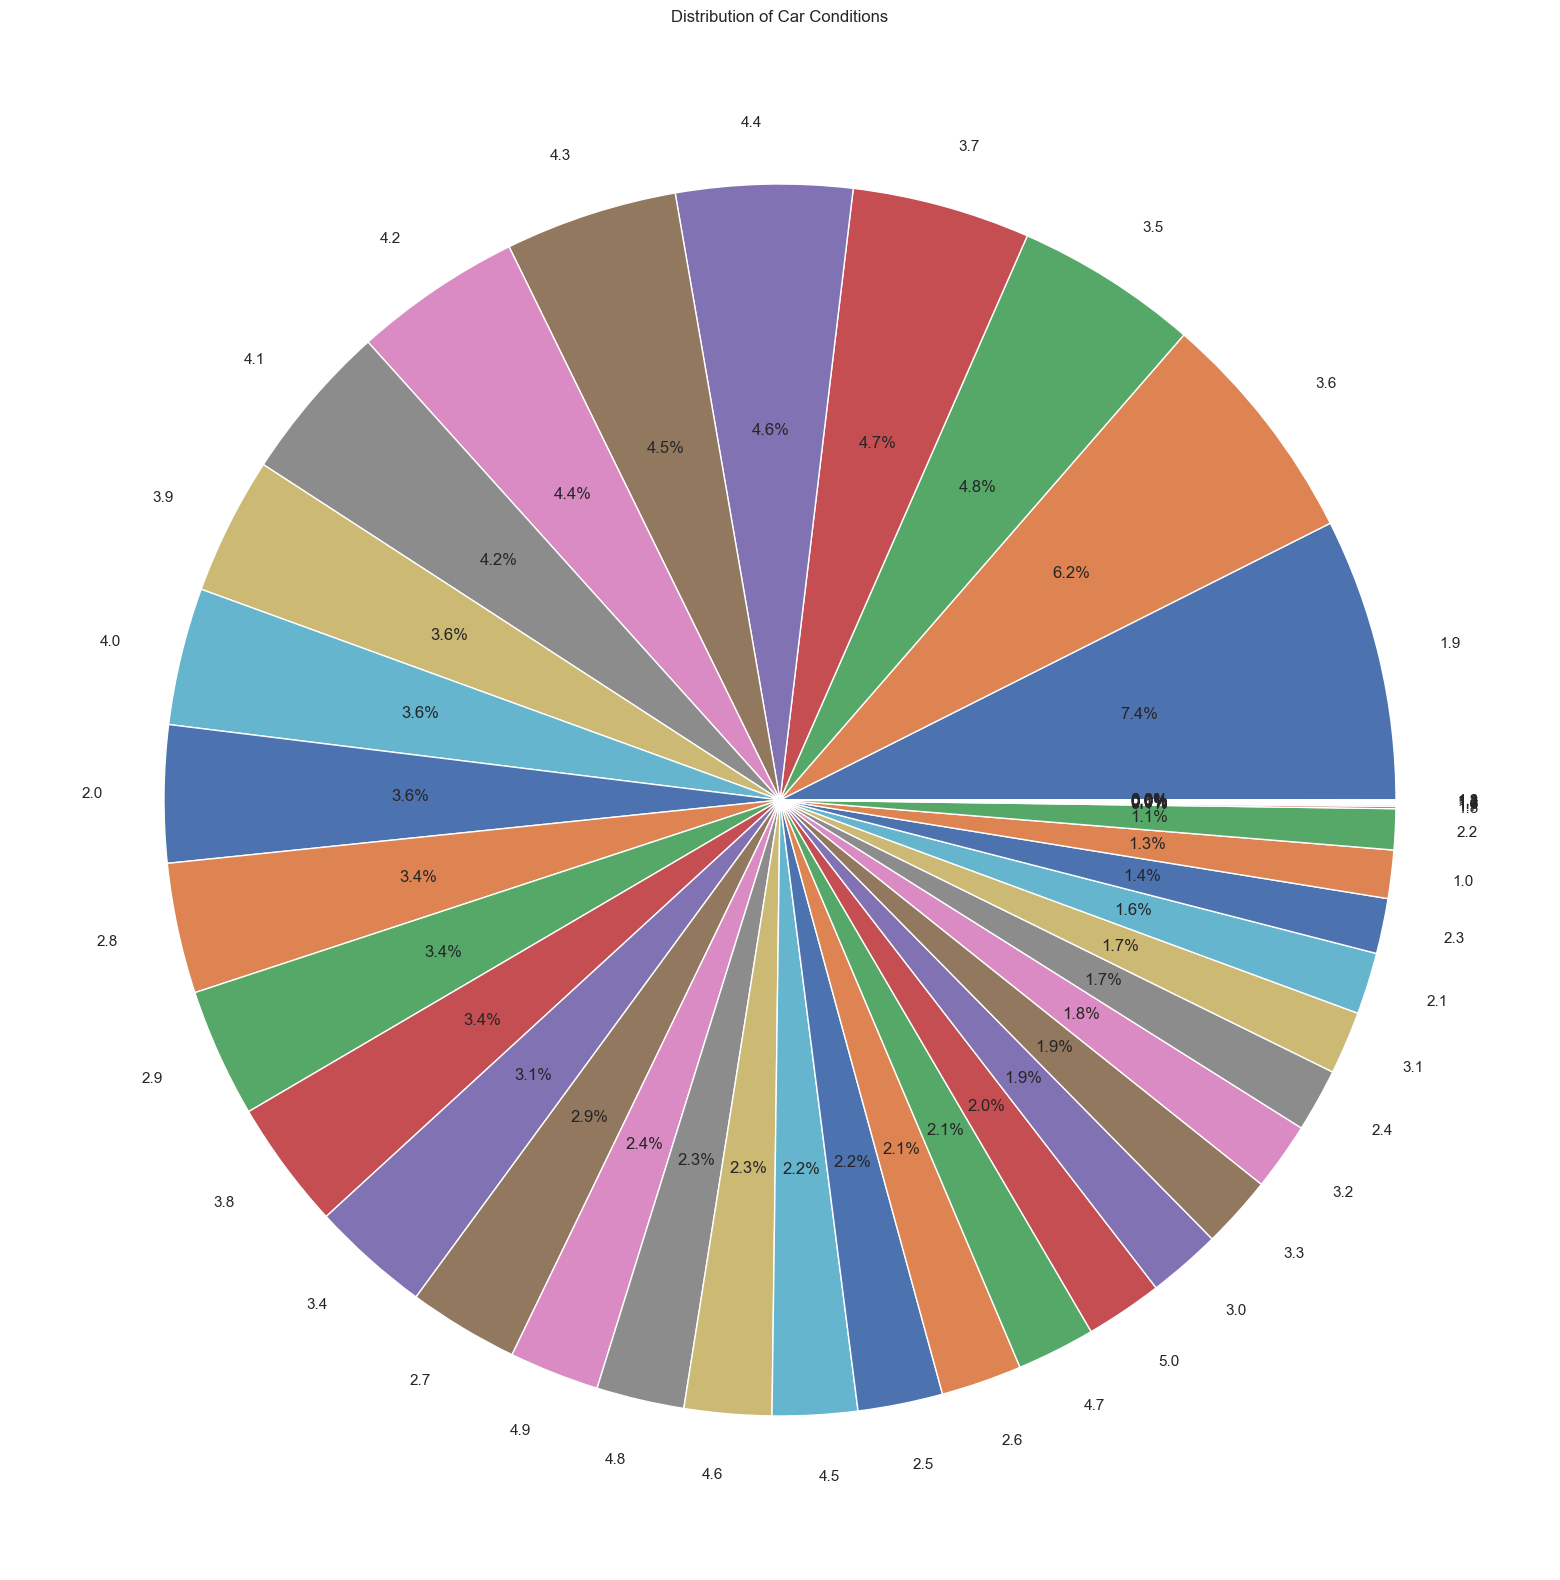

In [384]:
#Q14
condition_counts = car['condition'].value_counts()
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Car Conditions')
plt.show()

## 15-what is the max and min mmr ?


In [385]:
#Q15
max_mmr = np.max(car['mmr'].values)
min_mmr = np.min(car['mmr'].values)
print('Maximum MMR:',max_mmr)
print('Minimum MMR:',min_mmr)

Maximum MMR: 182000.0
Minimum MMR: 25.0


## 16-How does the average selling price vary across different MMR ranges ?


In [386]:
#Q16
car['mmr'] = pd.qcut(car['mmr'], q=5)
average_price_mmr_range = car.groupby('mmr')['sellingprice'].mean()
print(average_price_mmr_range)

mmr
(24.999, 5875.0]        3104.907064
(5875.0, 10700.0]       8397.770291
(10700.0, 14250.0]     12273.102516
(14250.0, 20300.0]     16848.060808
(20300.0, 182000.0]    28087.583989
Name: sellingprice, dtype: float64


## 17-What is the relationship between the odometer reading and car age ?


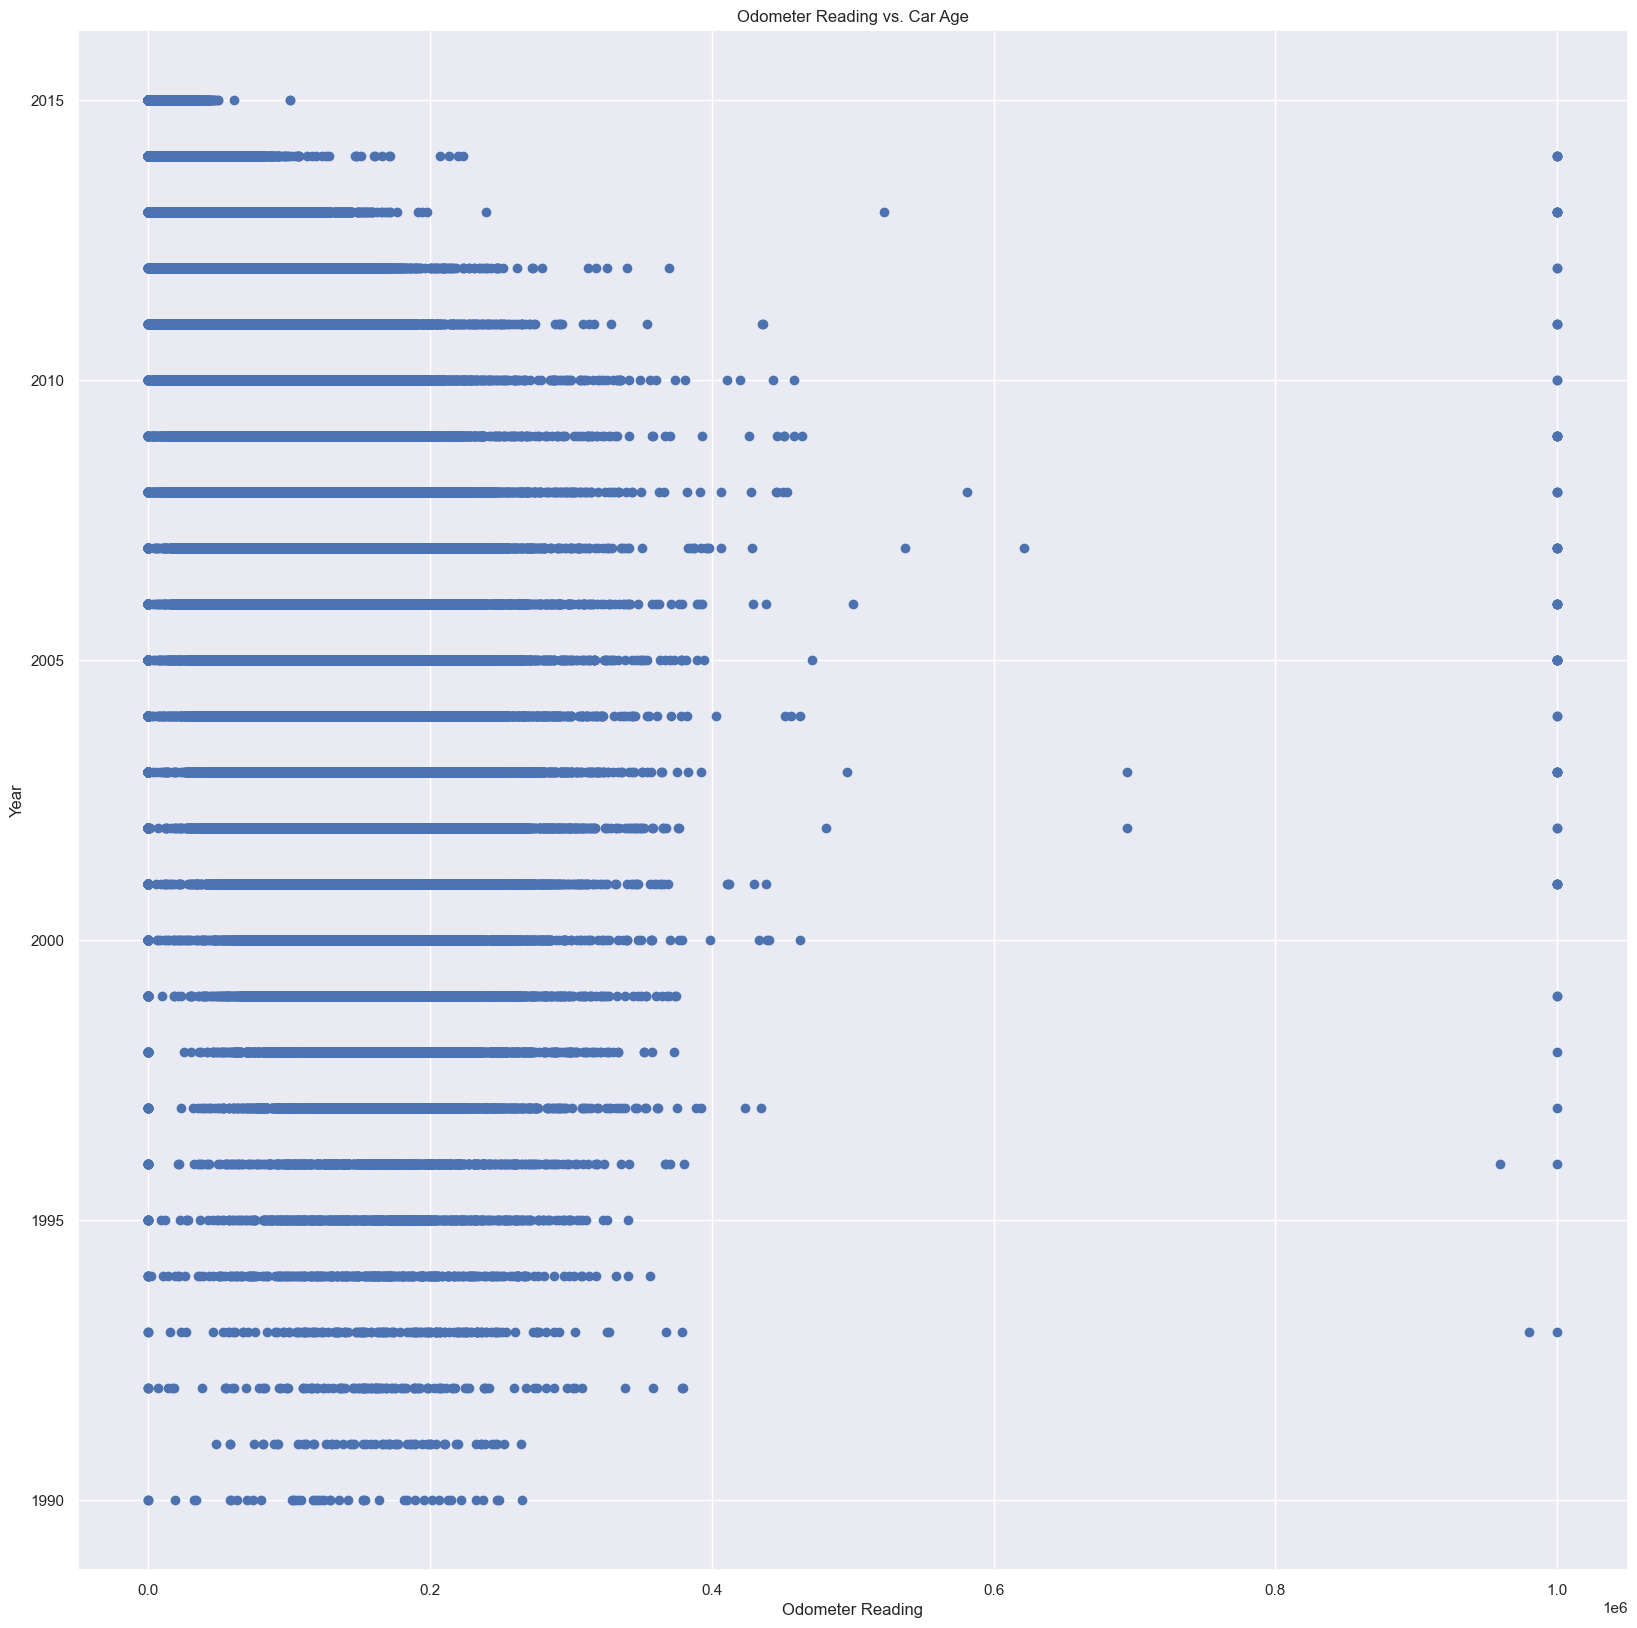

In [387]:
#Q17
odometer_values = car['odometer'].values
year_values = car['year'].values
plt.scatter(odometer_values, year_values)
plt.xlabel('Odometer Reading')
plt.ylabel('Year')
plt.title('Odometer Reading vs. Car Age')
plt.show()

## 18-What is the correlation between numerical variables (MMR, odometer, year, selling price) ?


C:\Users\7ob4a\AppData\Local\Temp\ipykernel_12028\2815053039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car[['mmr', 'odometer', 'year', 'sellingprice']].corr()


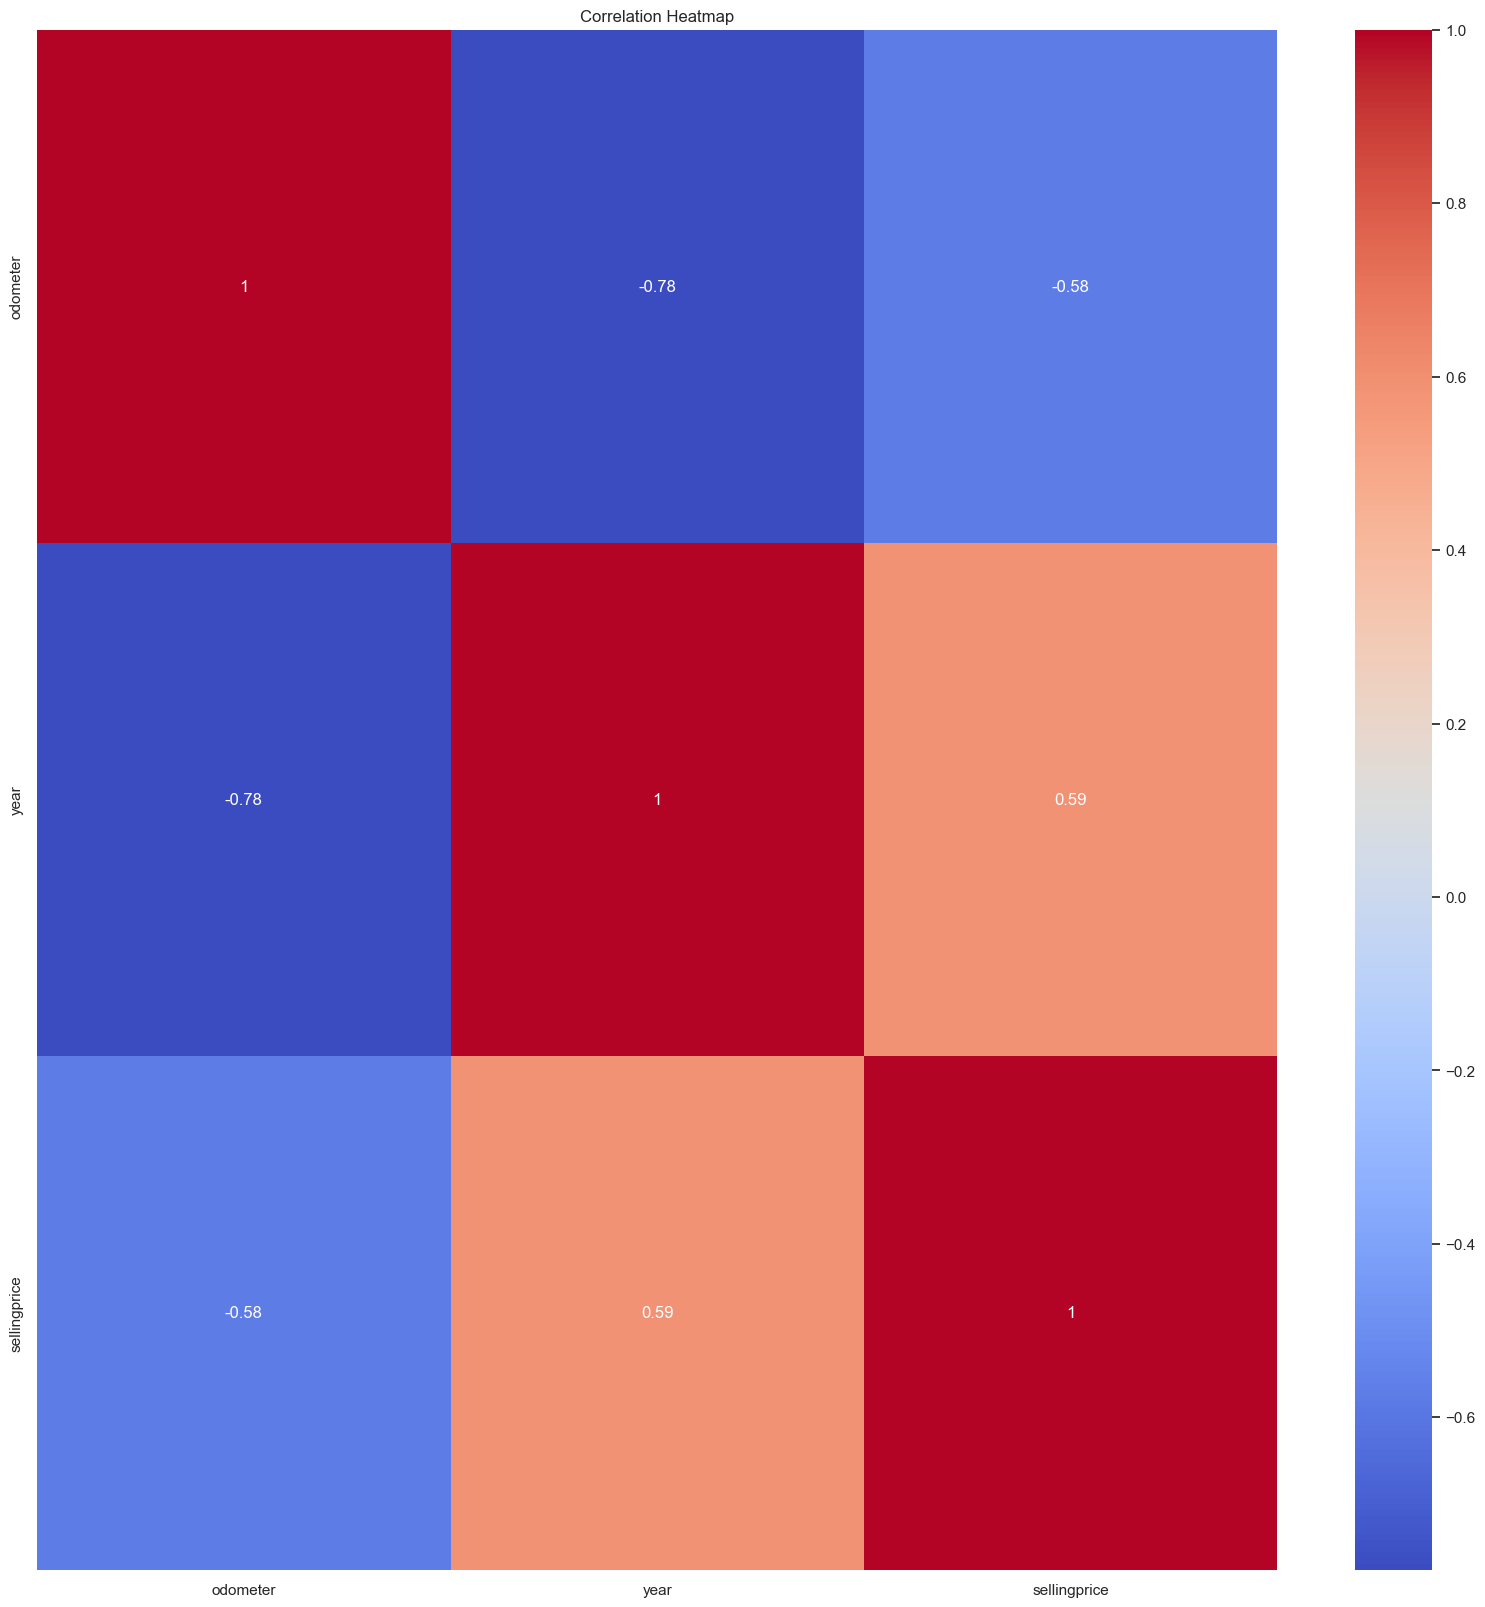

In [388]:
#Q18
correlation_matrix = car[['mmr', 'odometer', 'year', 'sellingprice']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 19-How does the selling price change with increasing mileage for different car makes and conditions ?


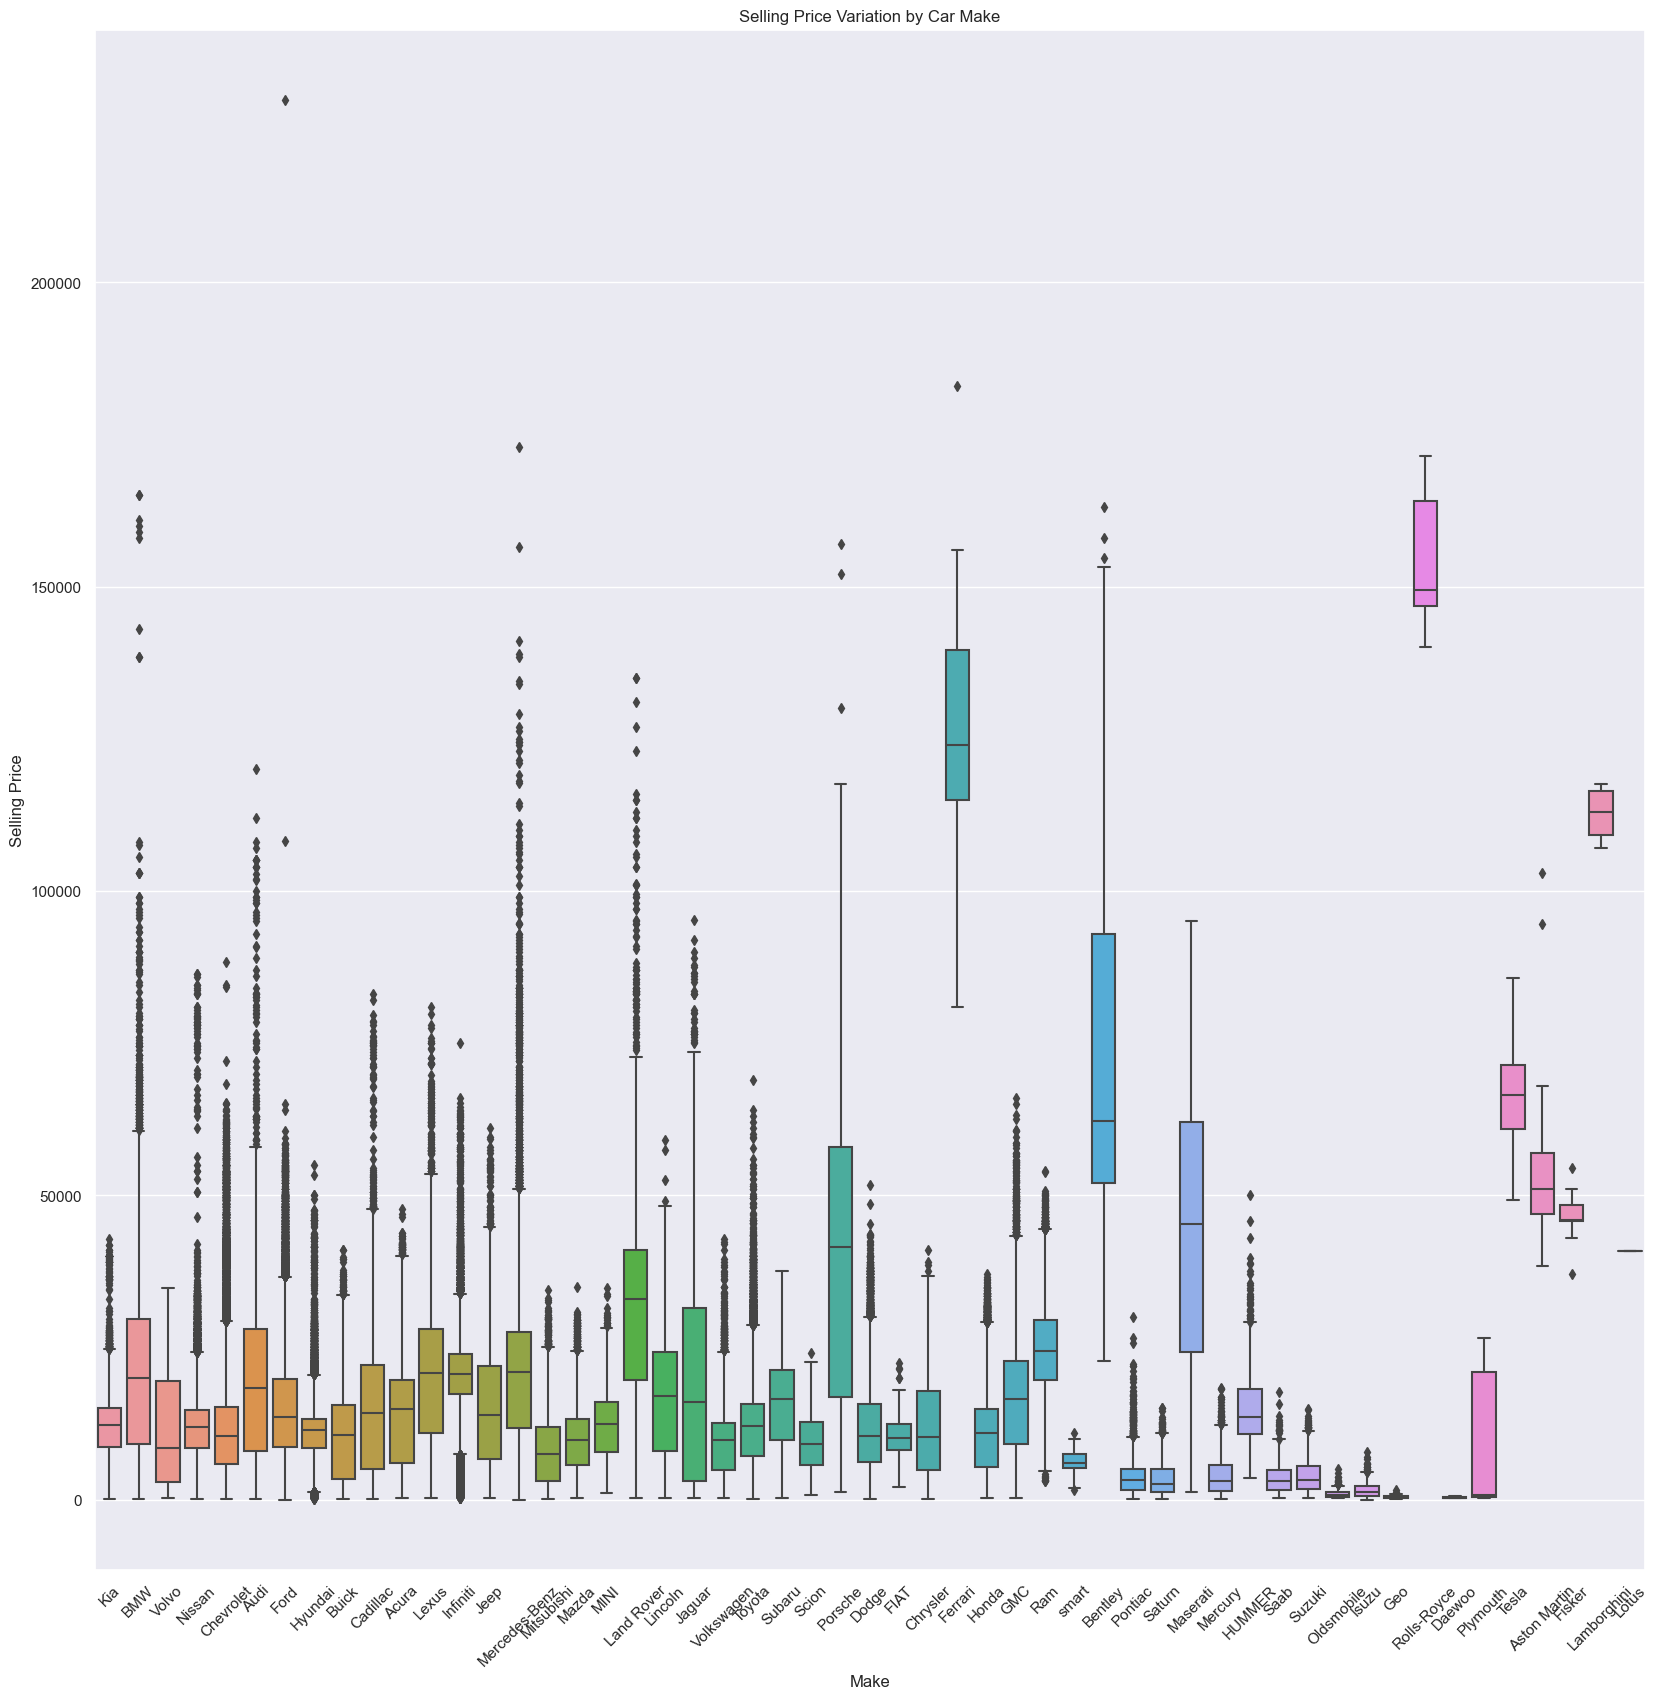

In [389]:
#Q19
sns.boxplot(x='make', y='sellingprice', data=car)
plt.xlabel('Make')
plt.ylabel('Selling Price')
plt.title('Selling Price Variation by Car Make')
plt.xticks(rotation=45)
plt.show()

## 20-What is the distribution of car conditions based on the year of the car ?


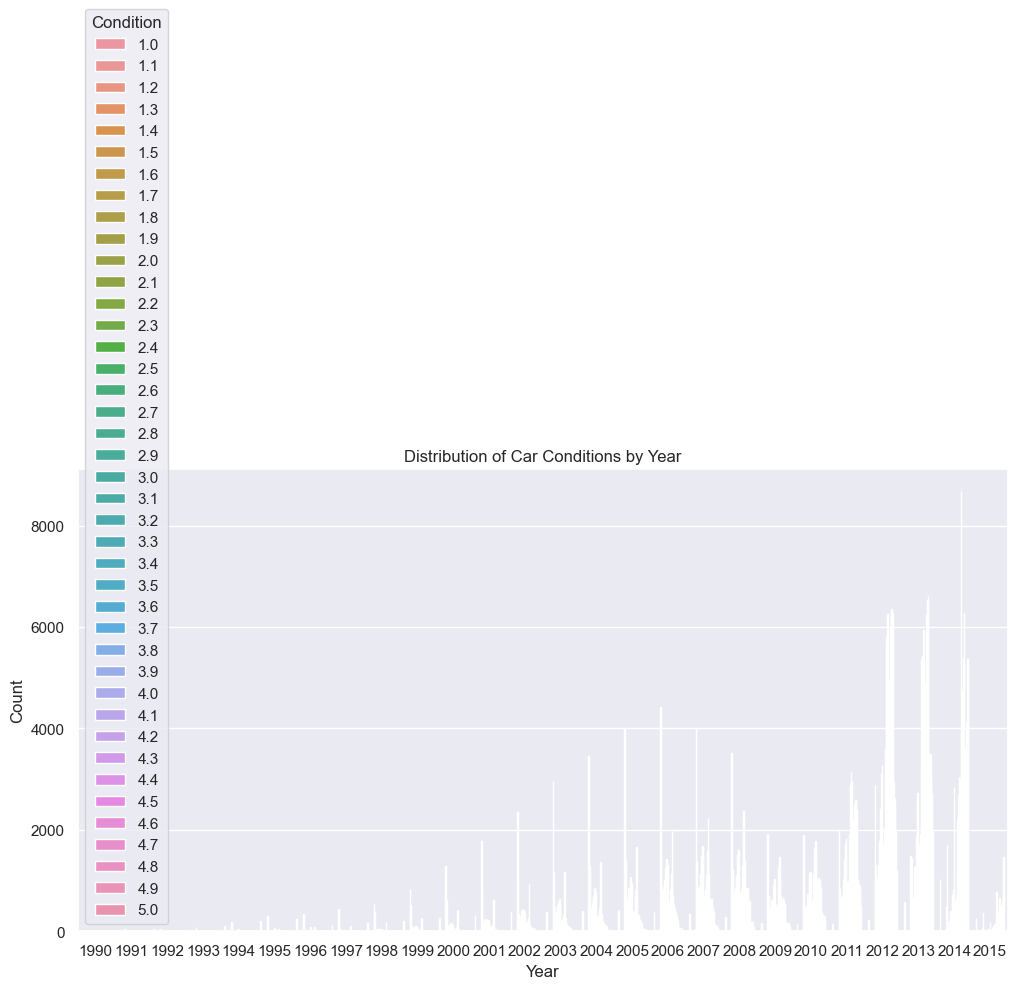

In [390]:
#Q20
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='condition', data=car)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Car Conditions by Year')
plt.legend(title='Condition')
plt.show()

# Machine Learning 

# ................................

### The Boston Housing Dataset


In [391]:
boston = fetch_openml(name='boston', version=1, as_frame=True)


C:\Users\7ob4a\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [392]:
X = boston.data


In [393]:
y = boston.target

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=44, shuffle =True)


In [395]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [396]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))

Linear Regression Train Score is :  0.7869213684709013
Linear Regression Test Score is :  0.6769369748797556


C:\Users\7ob4a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\7ob4a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [397]:
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Predicted Value for Linear Regression is :  [18.52242128 25.19958651 20.77921816 35.64396755 13.5010115  32.16981881
 19.52044682 24.07301736 30.27727235 20.53039843]


C:\Users\7ob4a\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [398]:
print('Predicted Value for Linear Regression is : ' , y_test[:10])

Predicted Value for Linear Regression is :  [17.8 21.5 21.2 32.4 10.9 31.7 21.4 24.3 29.1 25. ]


In [399]:
car = pd.read_csv('C:/Users/7ob4a/Desktop/car.csv' ,low_memory=False)
print(car.sample(5))

        year       make             model     trim          body transmission  \
372133  2006   Chrysler  Town and Country       LX       Minivan          NaN   
326535  2012    Hyundai            Sonata      GLS         Sedan    automatic   
538577  2012     Toyota             Venza  Limited         wagon          NaN   
335609  2014       Ford      E-Series Van    E-250  E-Series Van    automatic   
323618  2012  Chevrolet             Sonic       LS         Sedan    automatic   

                      vin state condition  odometer   color interior  \
372133  1a4gp44r46b567233    tn         1  140963.0     NaN      NaN   
326535  5npeb4ac2ch353587    tx       2.8   82253.0   black     gray   
538577  4t3bk3bb1cu065281    pa       3.9   48561.0   white     gray   
335609  1ftne2ew6eda18910    ny       4.3   11928.0   white     gray   
323618  1g1ja5sh1c4177194    pa       4.6   26685.0  silver     gray   

                          seller    mmr  sellingprice  \
372133  titlemax/clarks

In [400]:
car = car[["make", "sellingprice"]]
print(car.sample(5))

            make  sellingprice
167093      Audi         23750
44662   Cadillac          7200
126001      MINI         13500
500099     Honda          5400
204462      Ford          6800


In [401]:
car

,make,sellingprice
0,Kia,21500
1,Kia,21500
2,BMW,30000
3,Volvo,27750
4,BMW,67000
...,...,...
558832,Kia,33000
558833,Ram,30800
558834,BMW,34000
558835,Nissan,11100


In [402]:
car["sellingprice"] = car["sellingprice"].map({0: "Not Spam",
                                   1: "Spam Comment"})
print(car.sample(5))

             make sellingprice
378678  Chevrolet          NaN
558734     Toyota          NaN
161650  Chevrolet          NaN
34492         Ram          NaN
338167       Ford          NaN


In [416]:

x = np.array(car["make"])
y = np.array(car["sellingprice"])
car['sellingprice'] = car['sellingprice'].fillna('')

cv = CountVectorizer()
x = cv.fit_transform(car['sellingprice'].astype(str))
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.33, 
                                                random_state=42)
imputer = SimpleImputer(strategy='mean')  
x = imputer.fit_transform(x)
model = BernoulliNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.952520646144336


In [417]:
sample = "Check this out: https://www.kaggle.com/datasets/tunguz/used-car-auction-prices" 
car = cv.transform([sample]).toarray()
print(model.predict(car))

[11000]


In [418]:
sample = "Lack of information!" 
car = cv.transform([sample]).toarray()
print(model.predict(car)) 

[11000]


In [419]:
sample = "Lack of information!" 
car = cv.transform([sample]).toarray()
print(model.predict(car)) 

[11000]
